<h2 style="color:MediumVioletRed; font-family:Cursive"><b>About the data💡</h2>

* This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India.
* The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction , transactiondetails,transaction amount, etc.  

<h2 style="color:MediumVioletRed; font-family:Cursive"><b>Goal of creating this Notebook🎯</h2>

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.

### 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings('ignore')

### 2. Dataset Overview

In [2]:
df = pd.read_csv('bank_transactions.csv')
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  CustAccountBalance TransactionDate  TransactionTime  TransactionAmount (INR)
0            T1   C5841053     10/1/94          F   JAMSHEDPUR            17819.05          2/8/16           143207                    25.00
1            T2   C2142763      4/4/57          M      JHAJJAR             2270.69          2/8/16           141858                 27999.00
2            T3   C4417068    26/11/96          F       MUMBAI            17874.44          2/8/16           142712                   459.00
3            T4   C5342380     14/9/73          F       MUMBAI           866503.21          2/8/16           142714                  2060.00
4            T5   C9031234     24/3/88          F  NAVI MUMBAI             6714.43          2/8/16           181156                  1762.50

In [3]:
df.shape

(1048567, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
df.describe().T

count      mean       std  min       25%       50%       75%          max
CustAccountBalance      1046198.00 115403.54 846485.38 0.00   4721.76  16792.18  57657.36 115035495.10
TransactionTime         1048567.00 157087.53  51261.85 0.00 124030.00 164226.00 200010.00    235959.00
TransactionAmount (INR) 1048567.00   1574.34   6574.74 0.00    161.00    459.03   1200.00   1560034.99

In [6]:
df.dropna(inplace=True)

### 3. EDA

#### a) Time Based Features - Age Based

In [7]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [8]:
df['TransactionTime'] = df['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

In [9]:
#We have converted customer dob, transation date and transaction time to datetime format
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  CustAccountBalance TransactionDate TransactionTime  TransactionAmount (INR)
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR            17819.05      2016-02-08        15:46:47                    25.00
1            T2   C2142763  2057-04-04          M      JHAJJAR             2270.69      2016-02-08        15:24:18                 27999.00
2            T3   C4417068  1996-11-26          F       MUMBAI            17874.44      2016-02-08        15:38:32                   459.00
3            T4   C5342380  2073-09-14          F       MUMBAI           866503.21      2016-02-08        15:38:34                  2060.00
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI             6714.43      2016-02-08        02:19:16                  1762.50

In [10]:
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)
df['CustBYear'] = df['CustomerDOB'].dt.year
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustBYear']

In [11]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index, axis=0)
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years=100)
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB']).dt.days / 365.25).astype(int)
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  CustAccountBalance TransactionDate TransactionTime  TransactionAmount (INR)  CustBYear  CustomerAge
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR            17819.05      2016-02-08        15:46:47                    25.00       1994           30
1            T2   C2142763  1957-04-04          M      JHAJJAR             2270.69      2016-02-08        15:24:18                 27999.00       1957           67
2            T3   C4417068  1996-11-26          F       MUMBAI            17874.44      2016-02-08        15:38:32                   459.00       1996           27
3            T4   C5342380  1973-09-14          F       MUMBAI           866503.21      2016-02-08        15:38:34                  2060.00       1973           51
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI             6714.43      2016-02-08        02:19:16                  1762.50       1988           36

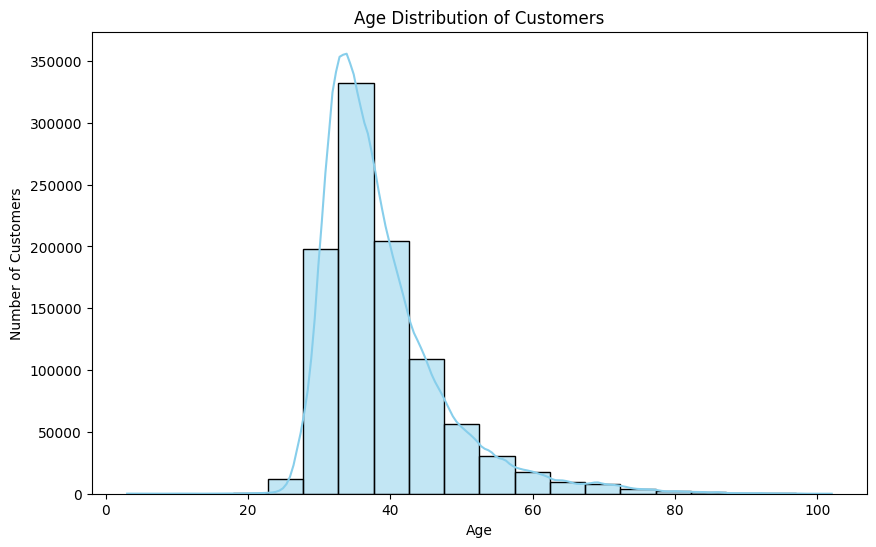

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [13]:
df = df[(df['CustomerAge'] >= 18) & (df['CustomerAge'] <= 90)]

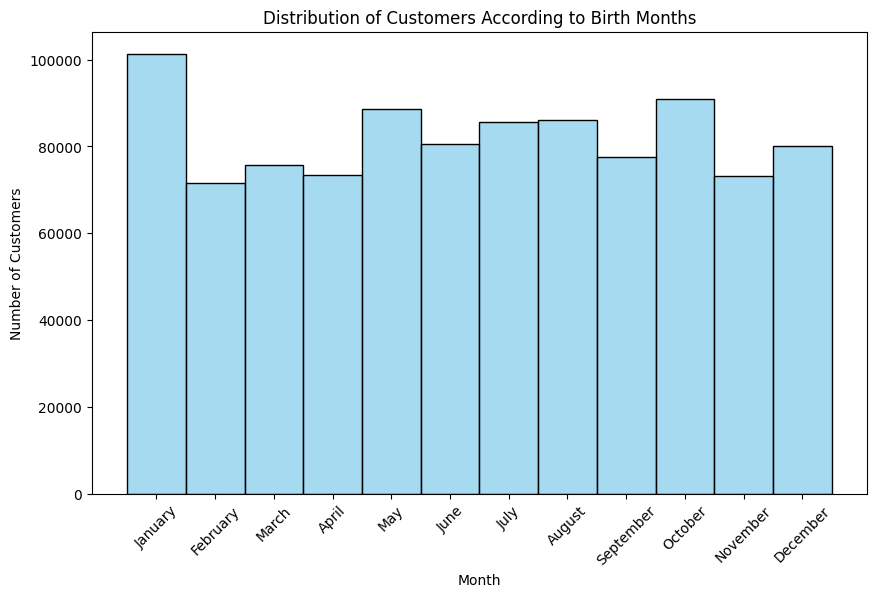

In [14]:
# Define the order of the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(pd.Categorical(df['CustomerDOB'].dt.month_name(), categories=months_order, ordered=True).sort_values(), color='skyblue')
plt.title('Distribution of Customers According to Birth Months')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': ' Distribution of Customer Age-group'}, xlabel='CustomerAge', ylabel='count'>

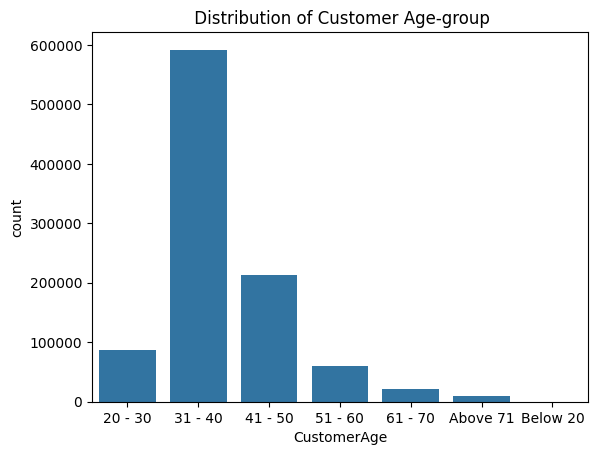

In [15]:
def age_group(age):
    if age < 20:
        return 'Below 20'
    elif age >= 20 and age <= 30:
        return '20 - 30'
    elif age > 30 and age <= 40:
        return '31 - 40'
    elif age > 40 and age <= 50:
        return '41 - 50'
    elif age > 50 and age <= 60:
        return '51 - 60'
    elif age >60 and age <= 70:
        return '61 - 70'
    else:
        return 'Above 71'
plt.title(' Distribution of Customer Age-group')
sns.countplot(x = df['CustomerAge'].apply(age_group).sort_values())  

In [16]:
df = df[~(df['TransactionAmount (INR)'] > df['CustAccountBalance'])]
balance_report=df.groupby('CustomerAge')[['CustAccountBalance', 'TransactionAmount (INR)']].agg(['min', 'max', 'mean'])
balance_report

CustAccountBalance                       TransactionAmount (INR)                 
                           min         max      mean                     min      max    mean
CustomerAge                                                                                  
18                     8295.63   116515.21  70237.18                   25.00  5787.69 2005.06
19                      583.82   378325.52  71266.99                   25.00 28750.00 2910.59
20                      488.42   233735.43  81287.39                   10.00 11696.00 1277.09
21                      131.10   116516.02  17631.09                   10.00  4950.00  777.05
22                      403.99   247140.63  29641.61                    0.00 16400.00 1497.23
...                        ...         ...       ...                     ...      ...     ...
86                      577.57 10013687.25 270329.09                    1.27 40867.00 1699.57
87                      232.83  2545071.78 300887.39                    1.00 24841.00 2387.34
88                     1673.04  4959673.29 817682.02                   80.00 21063.00 3030.87
89                      264.64  3019371.65 268305.06                   35.00 39140.00 2728.20
90                      614.49   849206.10 121757.93                   36.00  8767.00 1250.17

[73 rows x 6 columns]

In [17]:
df['BalTransRatio'] = df['TransactionAmount (INR)']/df['CustAccountBalance']
df['BalTransRatio'] = df['BalTransRatio'].replace([np.inf, -np.inf], np.nan)
bal_ratio = df.groupby('CustomerAge')['BalTransRatio'].agg(['min', 'max', 'mean'])
bal_ratio

min  max  mean
CustomerAge                
18          0.00 0.20  0.05
19          0.00 0.97  0.22
20          0.00 0.92  0.15
21          0.00 0.77  0.15
22          0.00 0.82  0.10
...          ...  ...   ...
86          0.00 0.87  0.07
87          0.00 0.69  0.07
88          0.00 0.87  0.06
89          0.00 0.92  0.06
90          0.00 0.89  0.06

[73 rows x 3 columns]

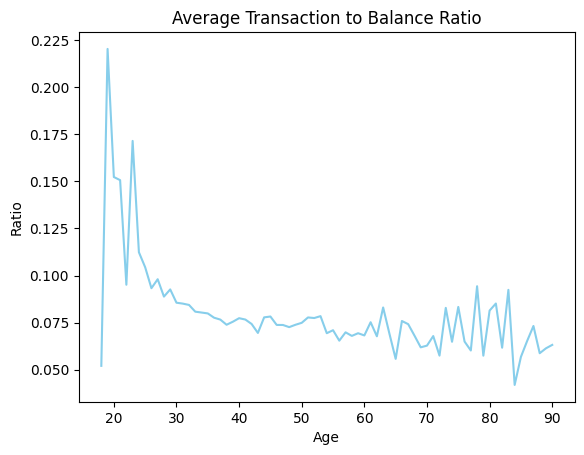

In [18]:
sns.lineplot(x=bal_ratio.index, y=bal_ratio['mean'], color='skyblue')
plt.title('Average Transaction to Balance Ratio')
plt.xlabel('Age')
plt.ylabel('Ratio')
plt.show()

**Age Group Analysis**:
   - **Age 21**: This group has the highest mean transaction/balance ratio of approximately 0.326. This indicates that, on average, individuals in this age group tend to engage in transactions that are about one-third of their balance. This could suggest a higher propensity for spending relative to their available funds compared to other age groups.

**General Trends**:
   - **Younger vs. Older**: Generally, younger age groups (18-25) tend to have higher mean ratios compared to older age groups (30-50). This aligns with expectations that younger individuals might have more active financial lives involving frequent transactions and expenditures.

**Financial Behavior Implications**:
   - **Spending Patterns**: Higher transaction/balance ratios suggest different spending habits. Age groups with higher ratios might benefit from products and services tailored to frequent transactions and digital banking, while those with lower ratios might prefer savings or investment products.

**Business Insights**:
   - Global Bank can use this data to tailor marketing strategies and product offerings. For instance, targeting younger age groups with mobile banking solutions or cash management tools could align well with their higher transaction activity.

#### b) Time based Analysis - Transaction Based

<Axes: xlabel='transaction_weekday', ylabel='count'>

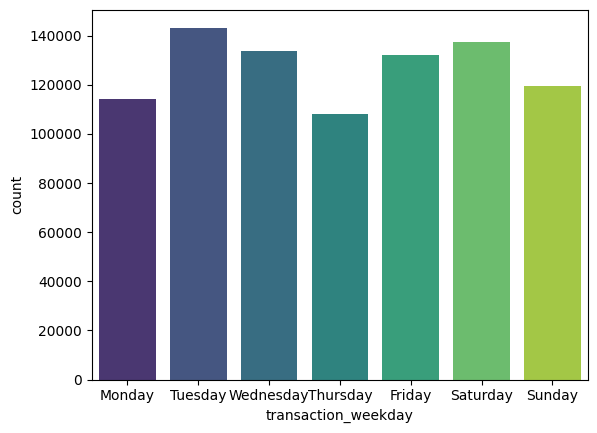

In [19]:
df['transaction_month'] = df['TransactionDate'].dt.month
df['transaction_year']  = df['TransactionDate'].dt.year
df['transaction_weekday'] = df['TransactionDate'].dt.dayofweek.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
sns.countplot(x = df['transaction_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')

Text(0, 0.5, 'No. of Transactions')

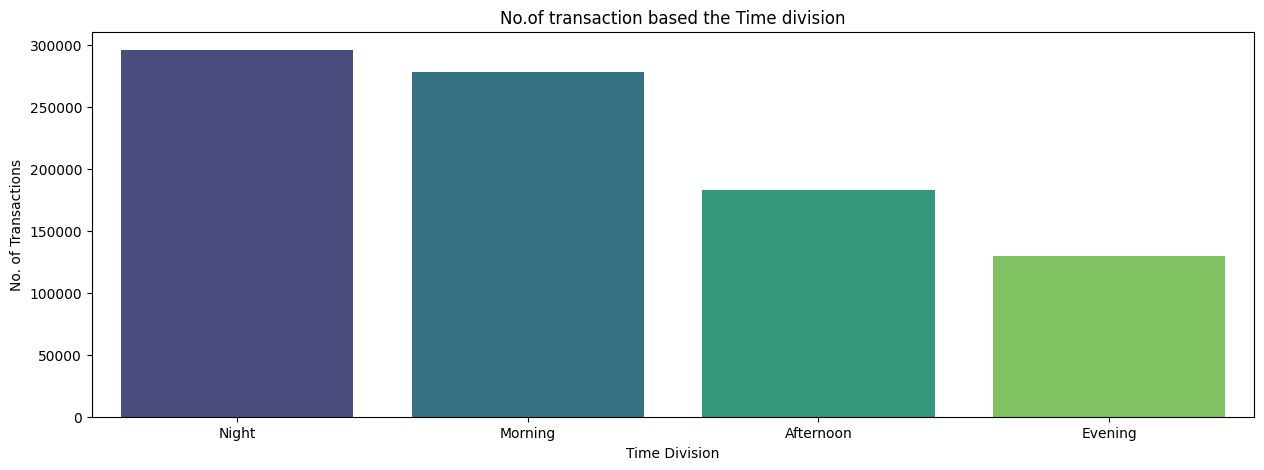

In [20]:
def time_division(time): 
    if time>= '06:00' and time< '12:00':
        return 'Morning'
    elif time >= '12:00' and time < '17:00':
        return "Afternoon"
    elif time >='17:00' and time < '22:00':
        return 'Evening'
    else :
        return 'Night'
df['transaction_time_division'] = df['TransactionTime'].apply(time_division)
df_transaction_time_division = df['transaction_time_division'].value_counts().reset_index()
plt.figure(figsize = [15,5])
sns.barplot(x = df_transaction_time_division['transaction_time_division'] , y = df_transaction_time_division['count'], palette='viridis')
plt.title('No.of transaction based the Time division')
plt.xlabel('Time Division')
plt.ylabel('No. of Transactions')

In [21]:
monthly_transaction = df.groupby([ 'transaction_month'])['TransactionAmount (INR)'].agg(['mean','count','median'])
monthly_transaction

mean   count  median
transaction_month                        
1                 1155.08   36095  384.00
2                 1271.61   36959  400.00
3                 1361.08   40070  477.59
4                 1406.66   40602  500.00
5                 1307.52   36093  414.52
6                 1345.33   39179  454.00
7                 1266.50   41615  480.00
8                 1268.83  362457  400.00
9                 1213.82  135034  378.00
10                1250.71   43422  432.75
11                1309.10   40258  465.00
12                1207.08   36162  395.37

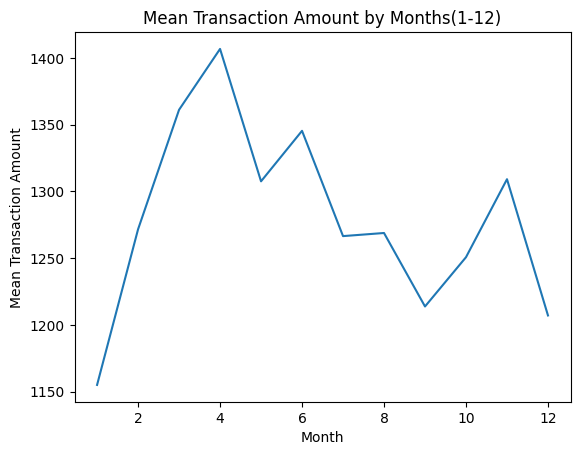

In [22]:
monthly_transaction[('mean')].plot(kind='line')
plt.title('Mean Transaction Amount by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Mean Transaction Amount')
plt.show()

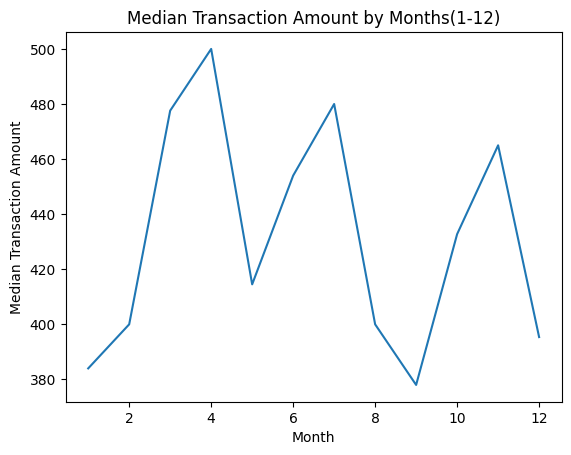

In [23]:
monthly_transaction[('median')].plot(kind='line')
plt.title('Median Transaction Amount by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Median Transaction Amount')
plt.show()

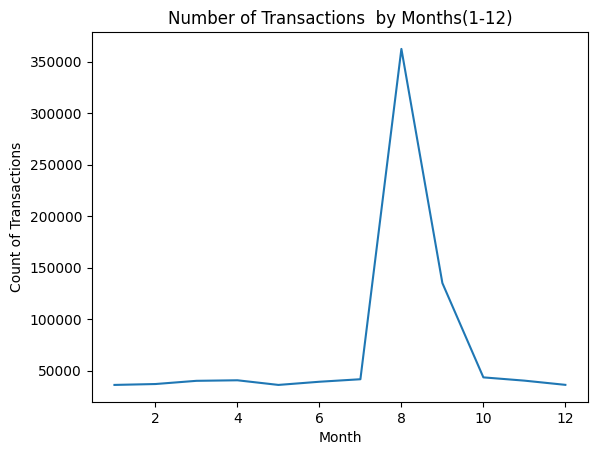

In [24]:
monthly_transaction[('count')].plot(kind='line')
plt.title('Number of Transactions  by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Count of Transactions')
plt.show()

In [25]:
time_split = df['TransactionTime'].str.split(':',expand=True)
df['transaction_hour'] = time_split[0].astype(int)
hourly_transactions = df.groupby([ 'transaction_hour'])['TransactionAmount (INR)'].agg(['mean','median','count'])
hourly_transactions

mean  median  count
transaction_hour                       
0                1344.84  450.00  41942
1                 925.48  251.00  21054
2                1330.22  424.07  52278
3                1288.84  435.00  37619
4                1089.53  306.00  32776
5                1281.72  455.00  60196
6                1194.18  418.00  36360
7                1244.46  407.00  49499
8                1229.65  479.60  57984
9                1257.20  400.00  32683
10               1306.71  450.00  61078
11               1112.18  410.00  40850
12               1375.51  404.00  30566
13               1214.74  400.00  52917
14               1090.76  340.00  25175
15               1357.92  439.00  37629
16               1279.93  405.00  36910
17               1219.10  365.00  22425
18               1444.38  490.00  34260
19               1349.33  382.00  14233
20               1301.42  389.00  25945
21               1525.35  500.00  33258
22               1039.63  289.00  12101
23               1380.63  400.00  38208

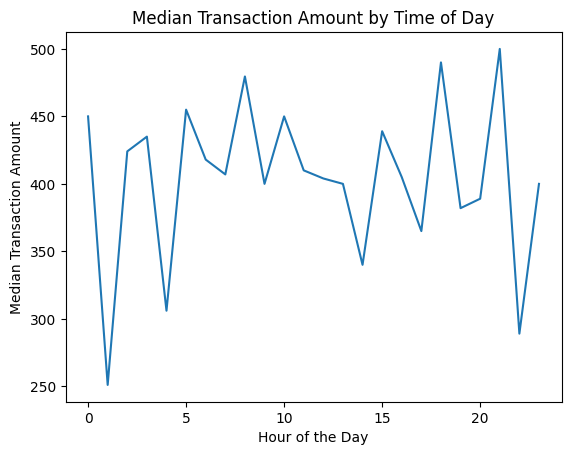

In [26]:
hourly_transactions[('median')].plot(kind='line')
plt.title('Median Transaction Amount by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Median Transaction Amount')
plt.show()

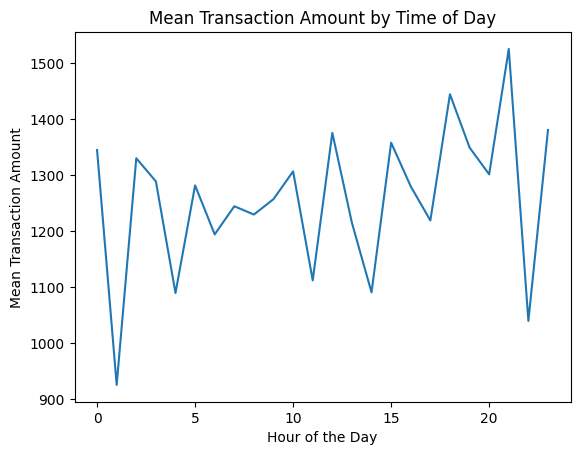

In [27]:
hourly_transactions[('mean')].plot(kind='line')
plt.title('Mean Transaction Amount by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Transaction Amount')
plt.show()

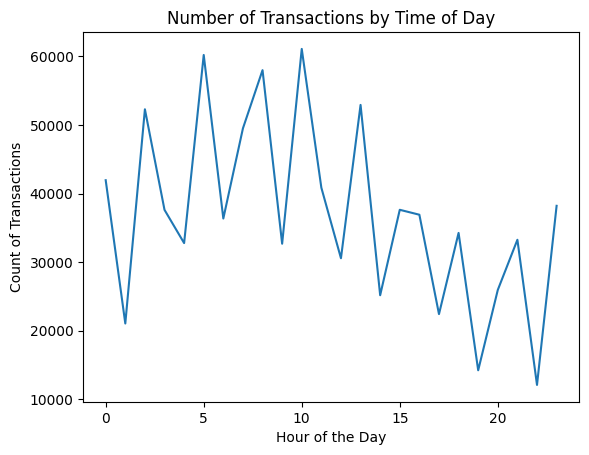

In [28]:
hourly_transactions[('count')].plot(kind='line')
plt.title('Number of Transactions by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Transactions')
plt.show()

In [29]:
monthly_and_hourly = df.groupby(['transaction_month','transaction_hour'])['TransactionAmount (INR)'].count()

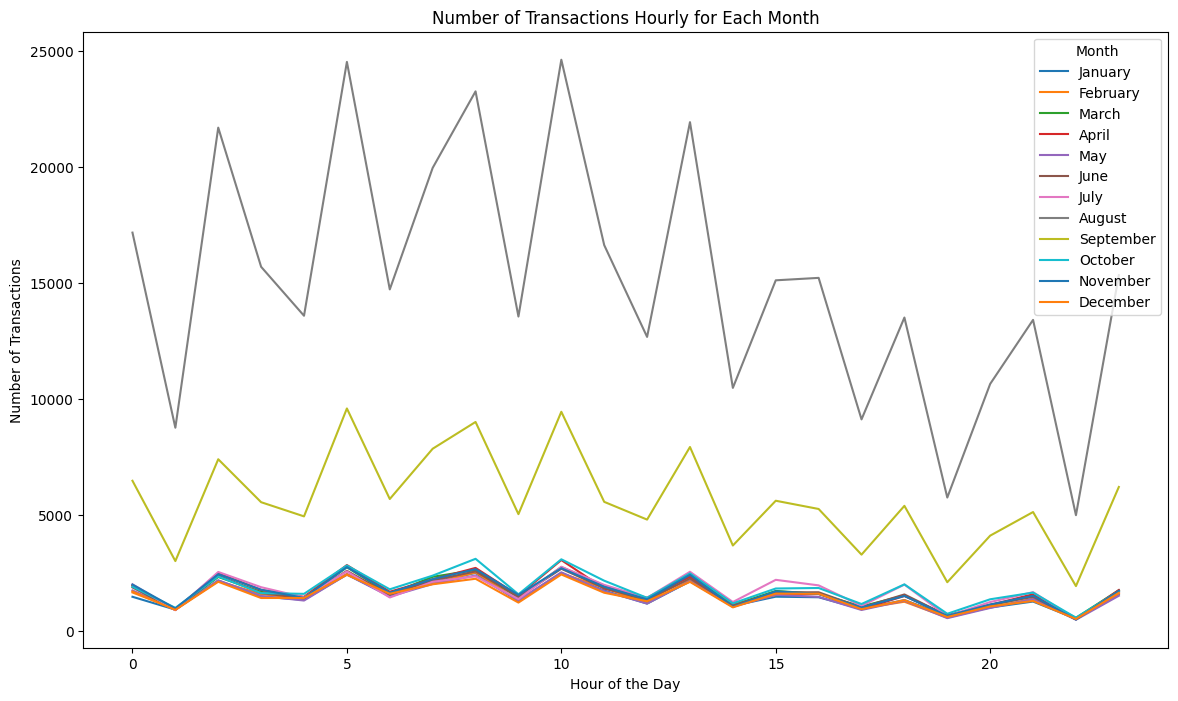

In [30]:
plt.figure(figsize=(14, 8))

# Plot each month's hourly transaction count in different colors
for month in range(1, 13):
    sns.lineplot(monthly_and_hourly.loc[month], label=months_order[month-1])

plt.title('Number of Transactions Hourly for Each Month')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Month')
plt.show()

#### c) Demographic Based

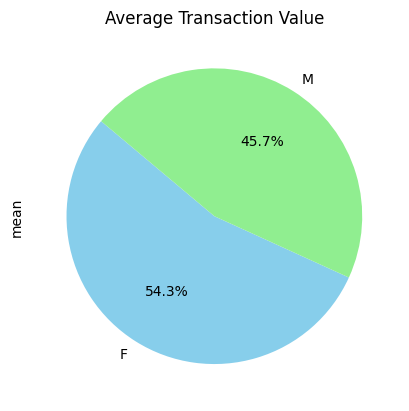

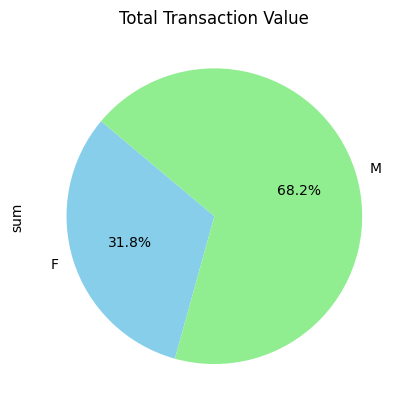

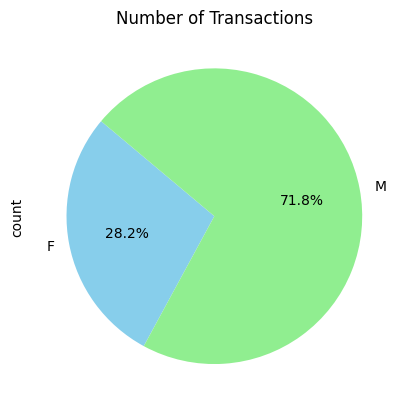

In [31]:
# Group by gender and sum the transaction amounts
gender_transaction_sum = df.groupby('CustGender')['TransactionAmount (INR)'].agg(['sum', 'count', 'mean'])
gender_transaction_sum[('mean')].plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Average Transaction Value')
plt.show()
gender_transaction_sum[('sum')].plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Total Transaction Value')
plt.show()
gender_transaction_sum[('count')].plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Number of Transactions')
plt.show()

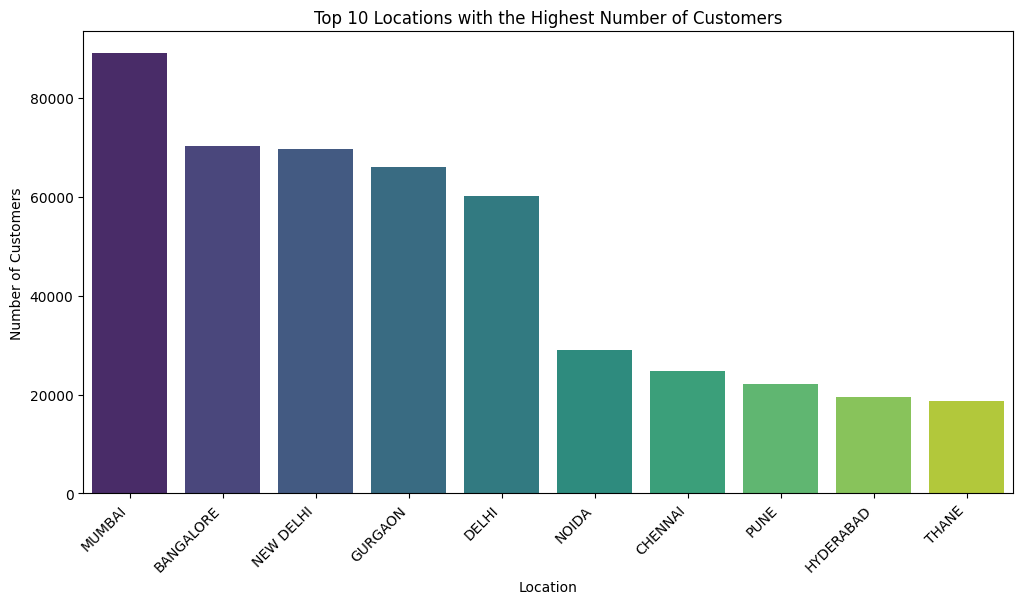

In [32]:
location_counts = df['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# Customer Tenure Analysis
customer_tenure = df.groupby('CustomerID')['TransactionDate'].agg(['min', 'max'])
customer_tenure['tenure_days'] = (customer_tenure['max'] - customer_tenure['min']).dt.days
df = df.merge(customer_tenure[['tenure_days']], on='CustomerID', how='left')

In [34]:
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  CustAccountBalance TransactionDate TransactionTime  TransactionAmount (INR)  CustBYear  CustomerAge  BalTransRatio  transaction_month  transaction_year transaction_weekday transaction_time_division  transaction_hour  tenure_days
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR            17819.05      2016-02-08        15:46:47                    25.00       1994           30           0.00                  2              2016              Monday                 Afternoon                15            0
1            T3   C4417068  1996-11-26          F       MUMBAI            17874.44      2016-02-08        15:38:32                   459.00       1996           27           0.03                  2              2016              Monday                 Afternoon                15            0
2            T4   C5342380  1973-09-14          F       MUMBAI           866503.21      2016-02-08        15:38:34                  2060.00       1973           51           0.00                  2              2016              Monday                 Afternoon                15          187
3            T5   C9031234  1988-03-24          F  NAVI MUMBAI             6714.43      2016-02-08        02:19:16                  1762.50       1988           36           0.26                  2              2016              Monday                     Night                 2            0
4            T6   C1536588  1972-08-10          F     ITANAGAR            53609.20      2016-02-08        00:19:00                   676.00       1972           52           0.01                  2              2016              Monday                     Night                 0            0

In [35]:
df.tenure_days.describe()

count   887946.00
mean        24.34
std         58.01
min          0.00
25%          0.00
50%          0.00
75%          1.00
max        336.00
Name: tenure_days, dtype: float64

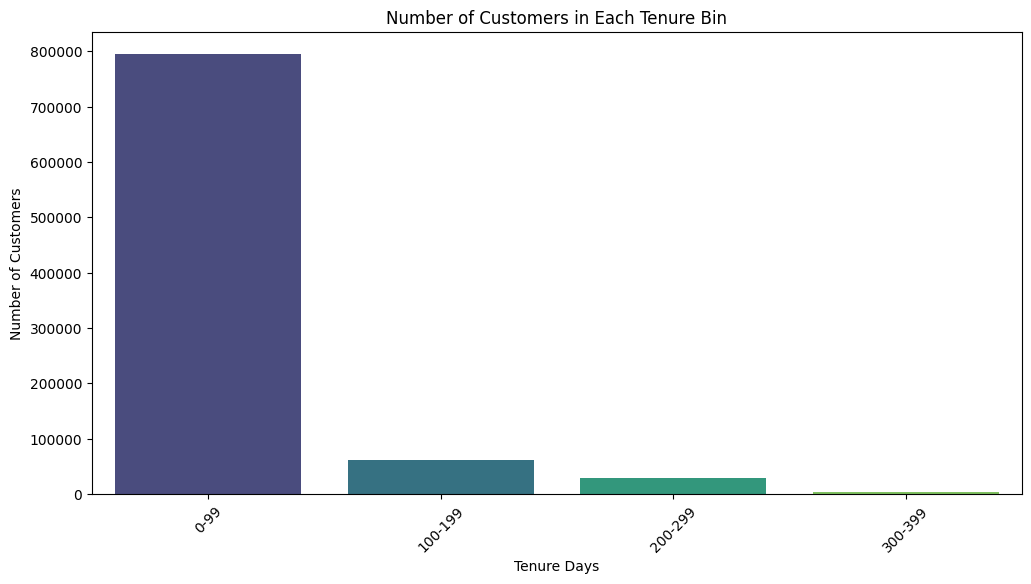

In [36]:
# Create bins for tenure days
bins = range(0, df['tenure_days'].max()+100, 100)
labels = [f'{i}-{i+99}' for i in bins[:-1]]

# Cut the tenure_days_y into bins
df['tenure_bins'] = pd.cut(df['tenure_days'], bins=bins, labels=labels, right=False)

# Count the number of customers in each bin
tenure_counts = df['tenure_bins'].value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(12, 6))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='viridis')
plt.title('Number of Customers in Each Tenure Bin')
plt.xlabel('Tenure Days')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887946 entries, 0 to 887945
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   TransactionID              887946 non-null  object        
 1   CustomerID                 887946 non-null  object        
 2   CustomerDOB                887946 non-null  datetime64[ns]
 3   CustGender                 887946 non-null  object        
 4   CustLocation               887946 non-null  object        
 5   CustAccountBalance         887946 non-null  float64       
 6   TransactionDate            887946 non-null  datetime64[ns]
 7   TransactionTime            887946 non-null  object        
 8   TransactionAmount (INR)    887946 non-null  float64       
 9   CustBYear                  887946 non-null  int32         
 10  CustomerAge                887946 non-null  int32         
 11  BalTransRatio              887943 non-null  float64 

### 4. Outlier Detection

Skewness of CustAccountBalance: 61.755866806465995
Kurtosis of CustAccountBalance: 6796.064460079798
Distribution Plot of CustAccountBalance:


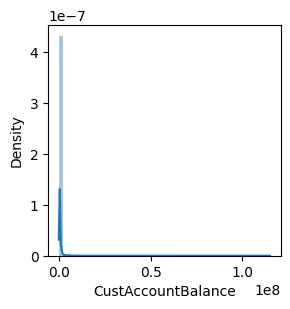

Box Plot of CustAccountBalance:


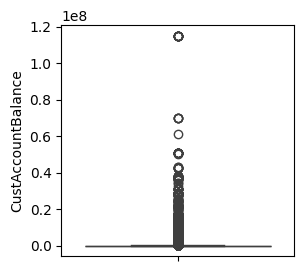

Quantile-Quantile Plot of CustAccountBalance:


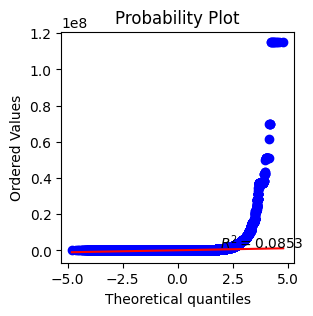

Skewness of TransactionAmount (INR): 27.620703935144753
Kurtosis of TransactionAmount (INR): 2058.5542835297824
Distribution Plot of TransactionAmount (INR):


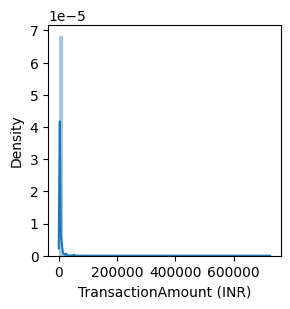

Box Plot of TransactionAmount (INR):


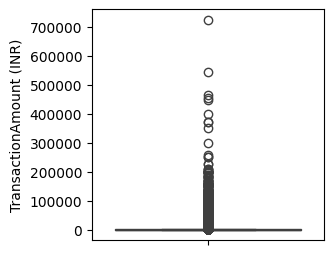

Quantile-Quantile Plot of TransactionAmount (INR):


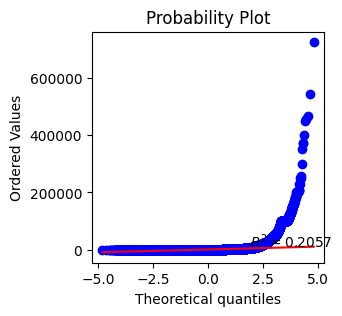

Skewness of CustBYear: -1.7084601889387736
Kurtosis of CustBYear: 3.9414151803828217
Distribution Plot of CustBYear:


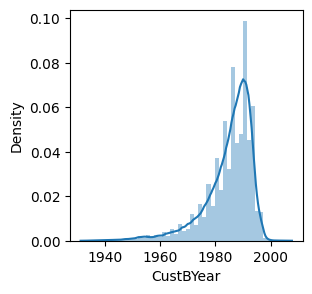

Box Plot of CustBYear:


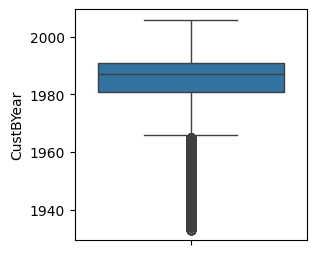

Quantile-Quantile Plot of CustBYear:


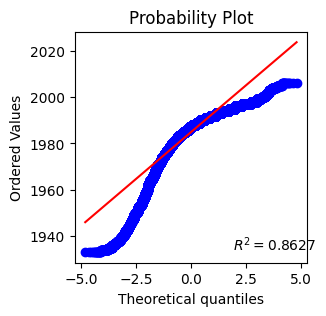

Skewness of CustomerAge: 1.7072961021122772
Kurtosis of CustomerAge: 3.9362636548467274
Distribution Plot of CustomerAge:


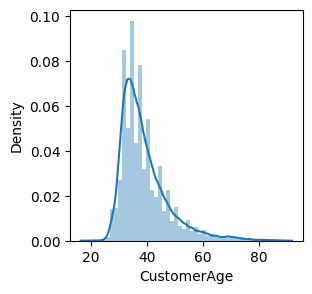

Box Plot of CustomerAge:


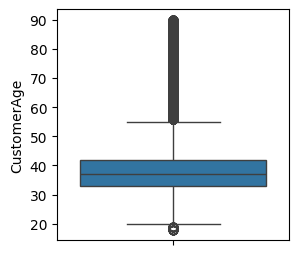

Quantile-Quantile Plot of CustomerAge:


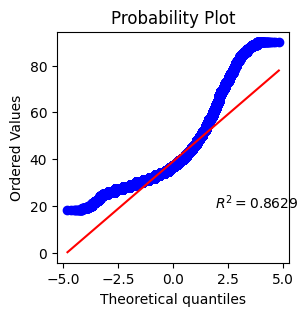

Skewness of BalTransRatio: 3.321070336733097
Kurtosis of BalTransRatio: 12.07057359475676
Distribution Plot of BalTransRatio:


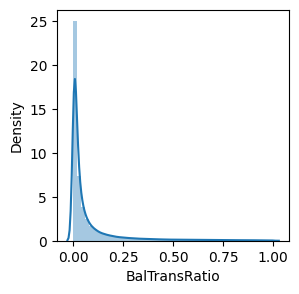

Box Plot of BalTransRatio:


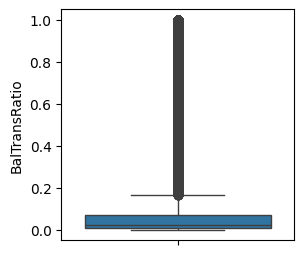

Quantile-Quantile Plot of BalTransRatio:


posx and posy should be finite values
posx and posy should be finite values


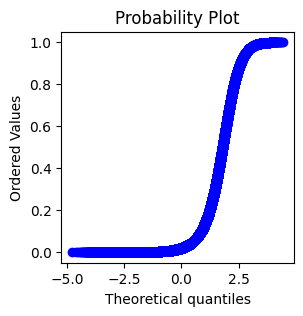

Skewness of transaction_month: -0.8140111840277903
Kurtosis of transaction_month: 0.21621397227553585
Distribution Plot of transaction_month:


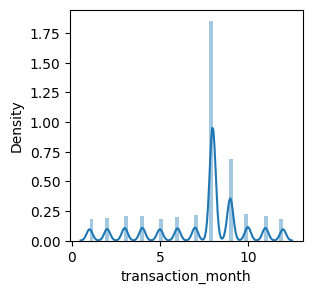

Box Plot of transaction_month:


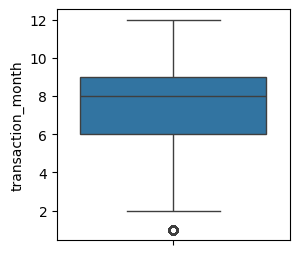

Quantile-Quantile Plot of transaction_month:


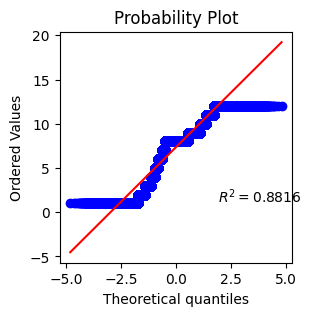

Skewness of transaction_year: 0.0
Kurtosis of transaction_year: 0.0
Distribution Plot of transaction_year:


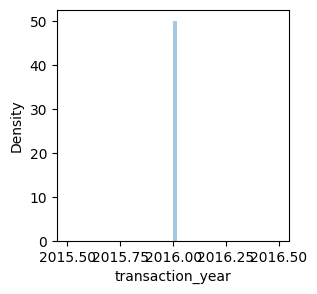

Box Plot of transaction_year:


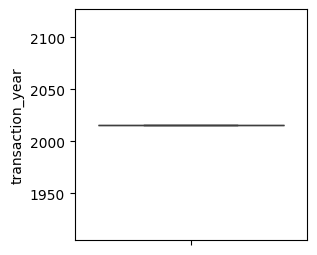

Quantile-Quantile Plot of transaction_year:


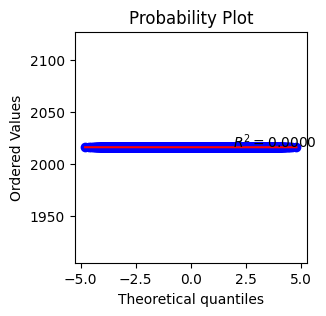

Skewness of transaction_hour: 0.2645572780638852
Kurtosis of transaction_hour: -0.9337702047769363
Distribution Plot of transaction_hour:


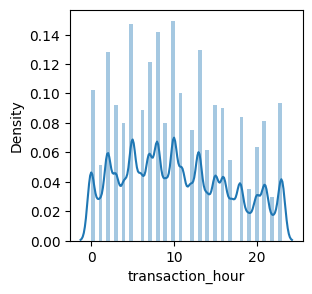

Box Plot of transaction_hour:


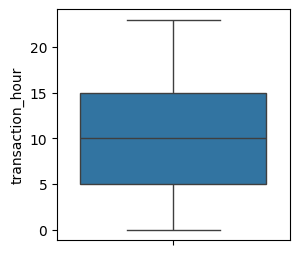

Quantile-Quantile Plot of transaction_hour:


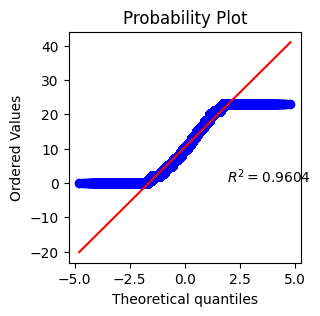

In [38]:
from scipy.stats import probplot
for col in df.columns:
    if (df[col].dtypes == np.float64 or df[col].dtypes == np.int32):
        print("Skewness of {}:".format(col),df[col].skew())
        print("Kurtosis of {}:".format(col),df[col].kurt())
        plt.figure(figsize=(3,3))
        print("Distribution Plot of {}:".format(col))
        sns.distplot(df[col])
        plt.show()
        print("Box Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        sns.boxplot(df[col])
        plt.show()
        print("Quantile-Quantile Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        probplot(df[col],plot=plt,rvalue=True)
        plt.show()

Number of outliers detected: 454449


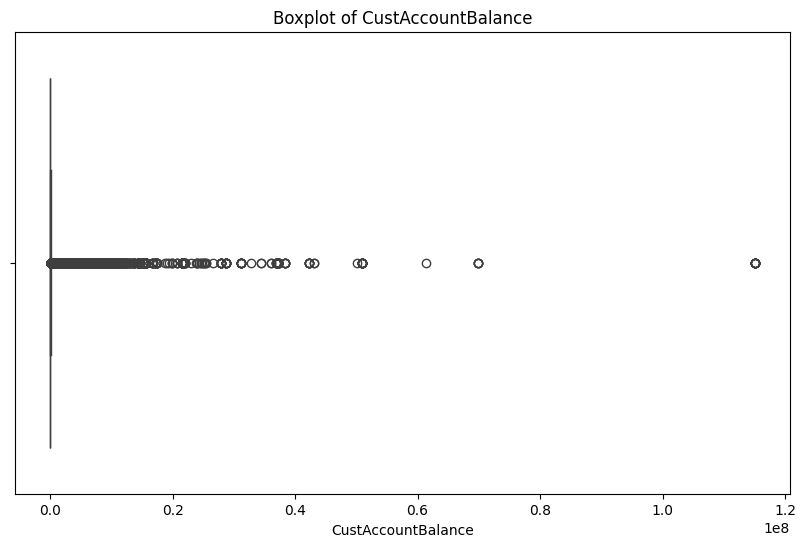

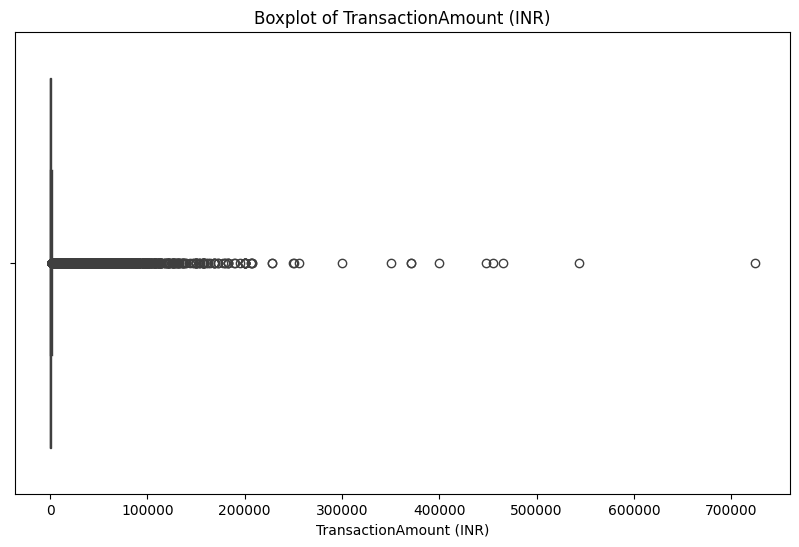

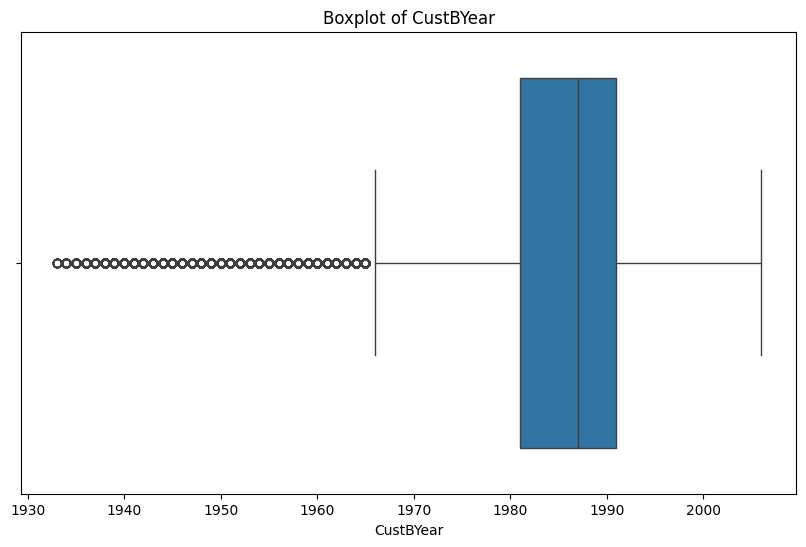

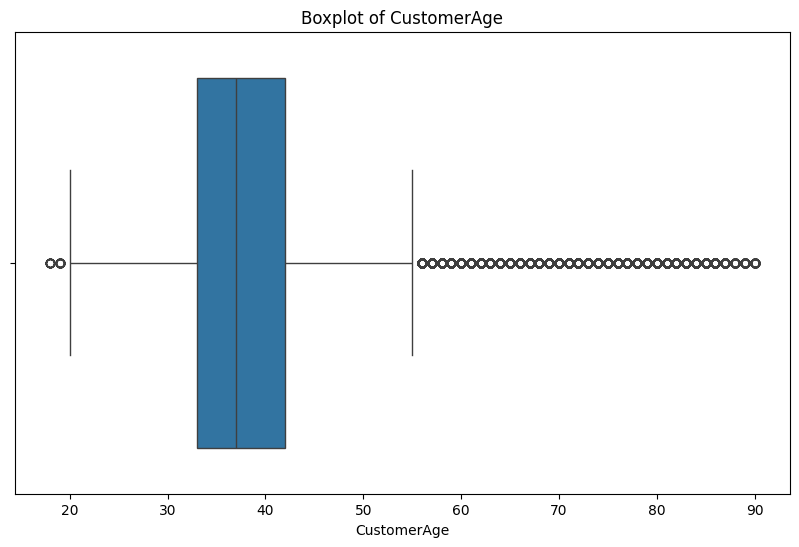

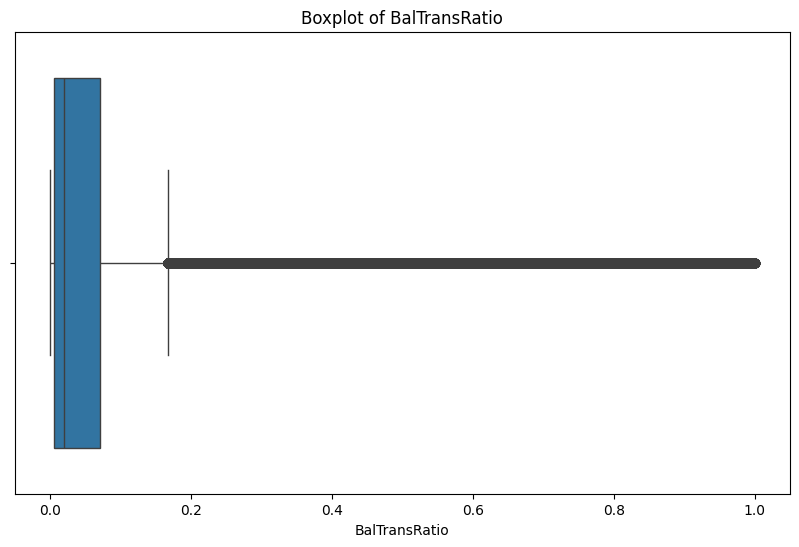

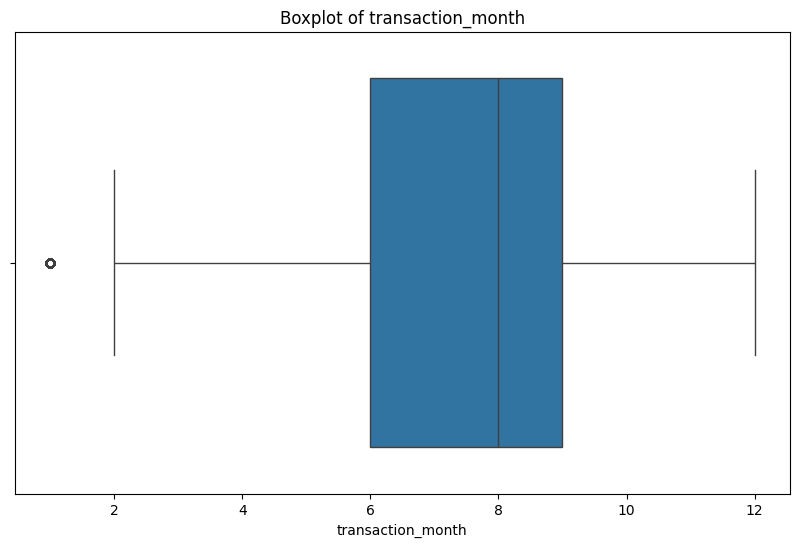

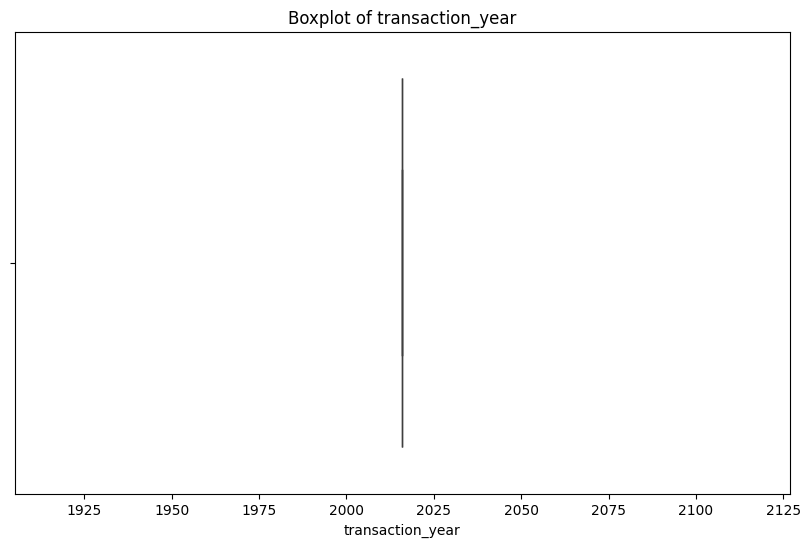

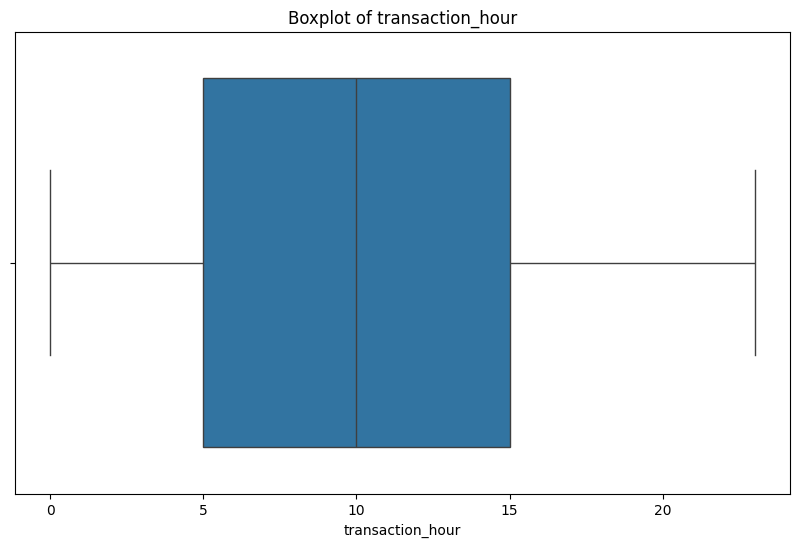

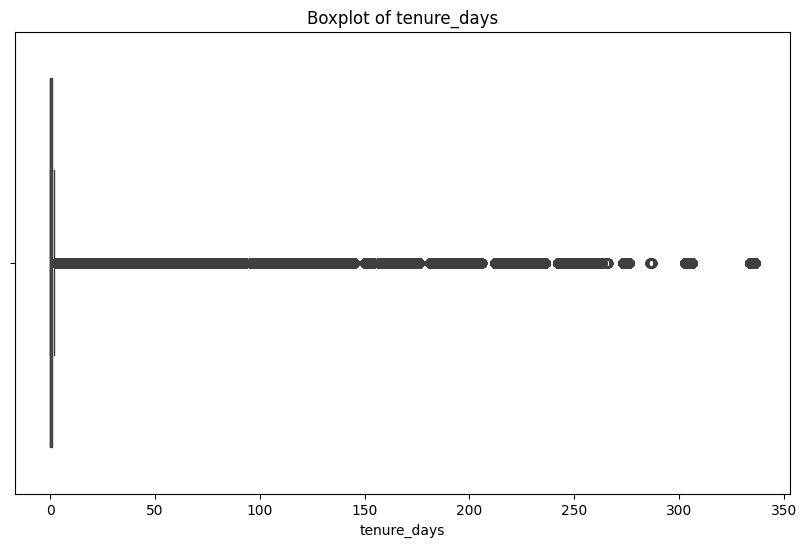

In [39]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame(columns=df.columns)
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = pd.concat([outliers, df[(df[col] < lower_bound) | (df[col] > upper_bound)]])
    return outliers.drop_duplicates()

# Detect outliers in the dataframe
outliers = detect_outliers_iqr(df)
print("Number of outliers detected:", outliers.shape[0])

# Visualize outliers for numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

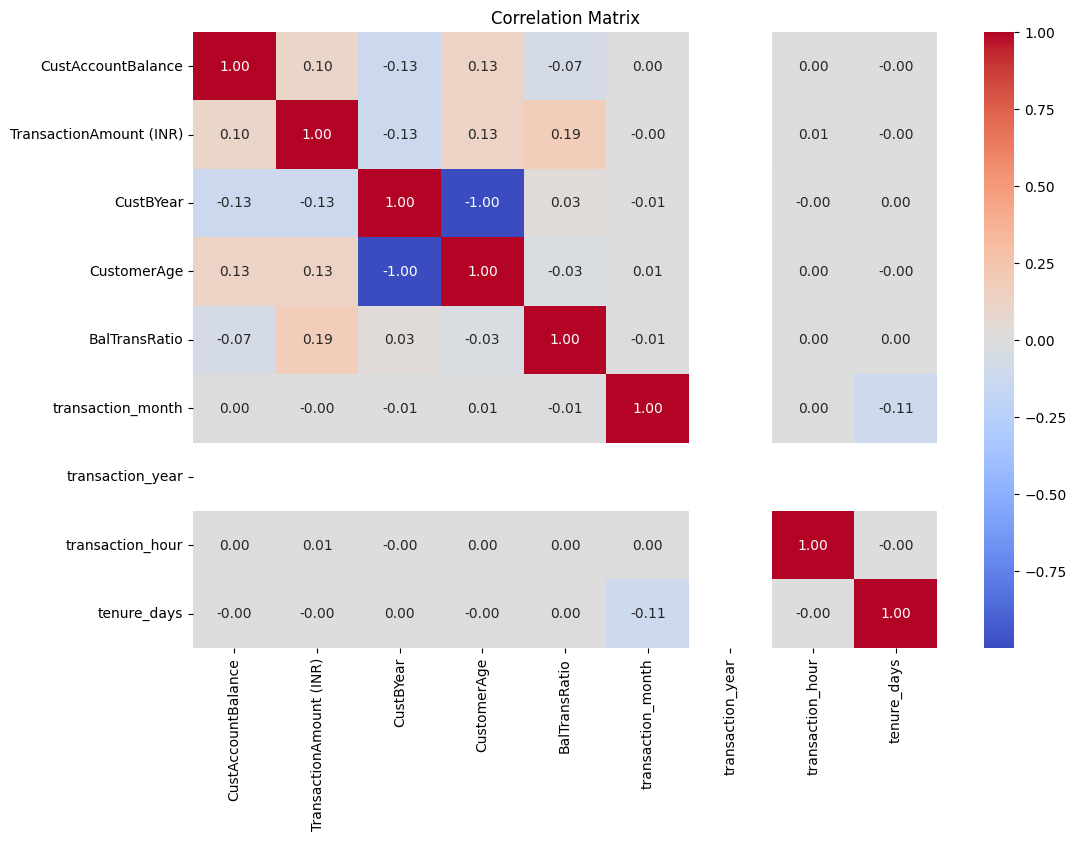

In [40]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

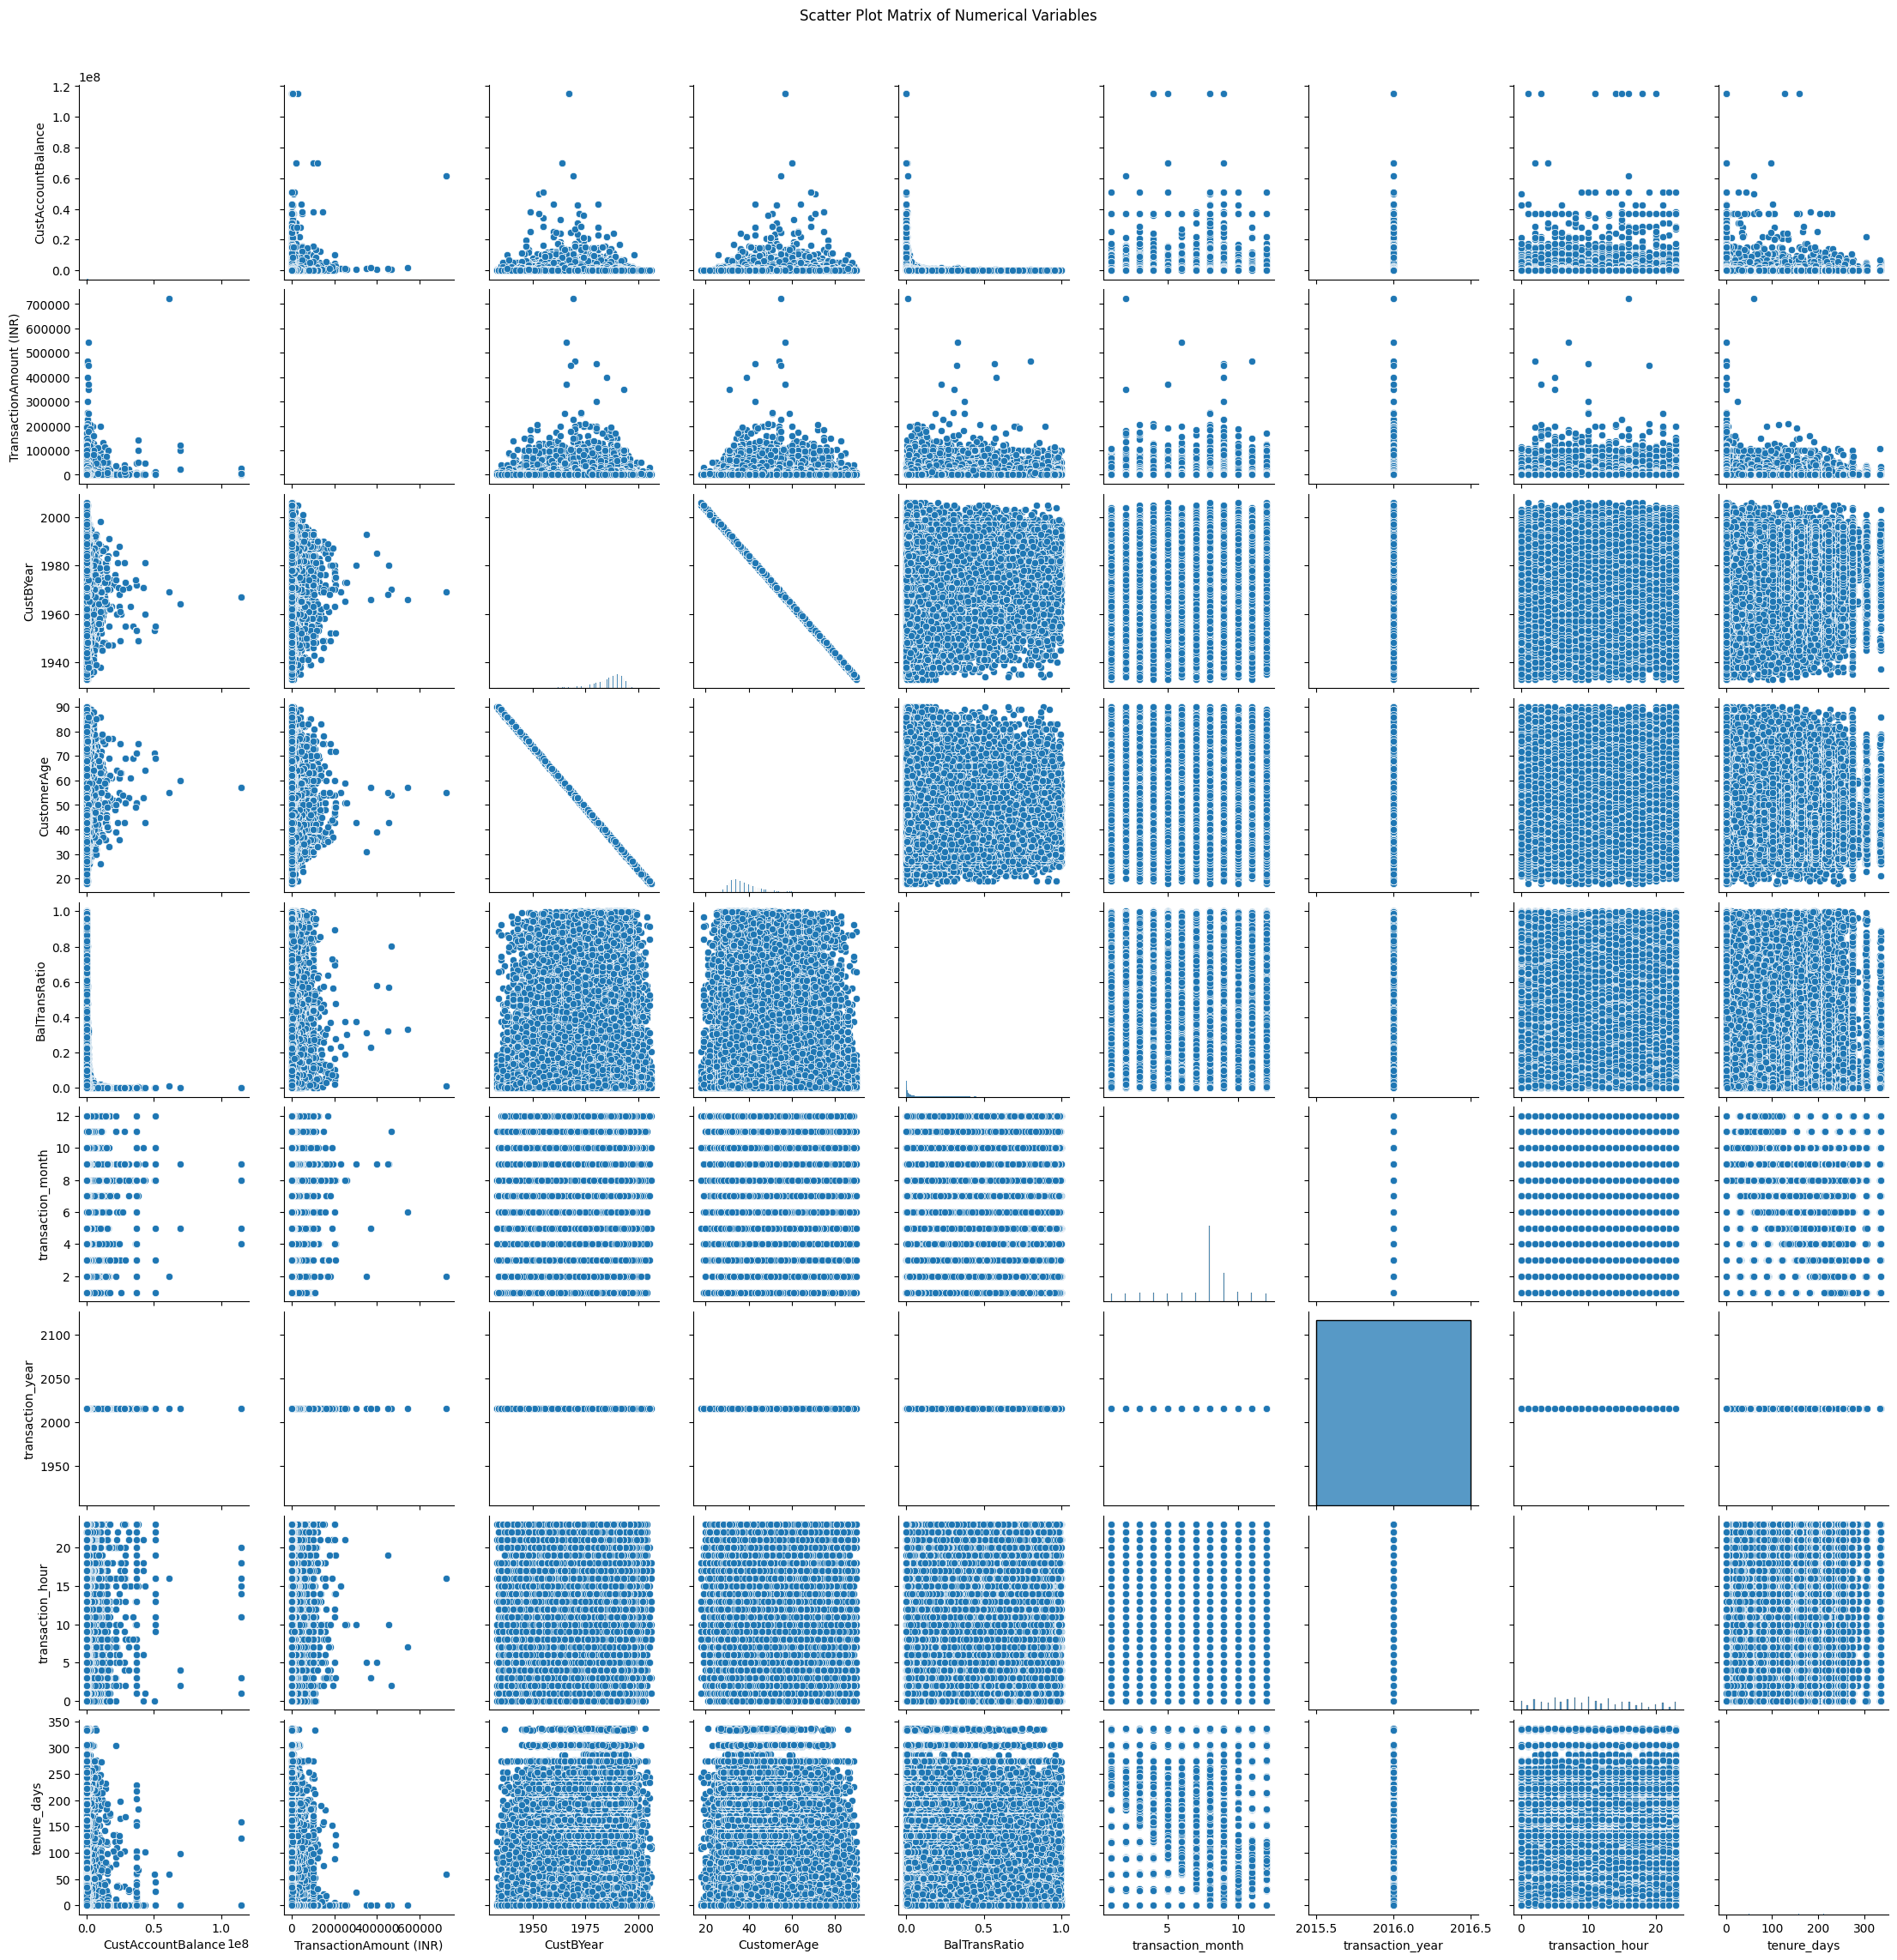

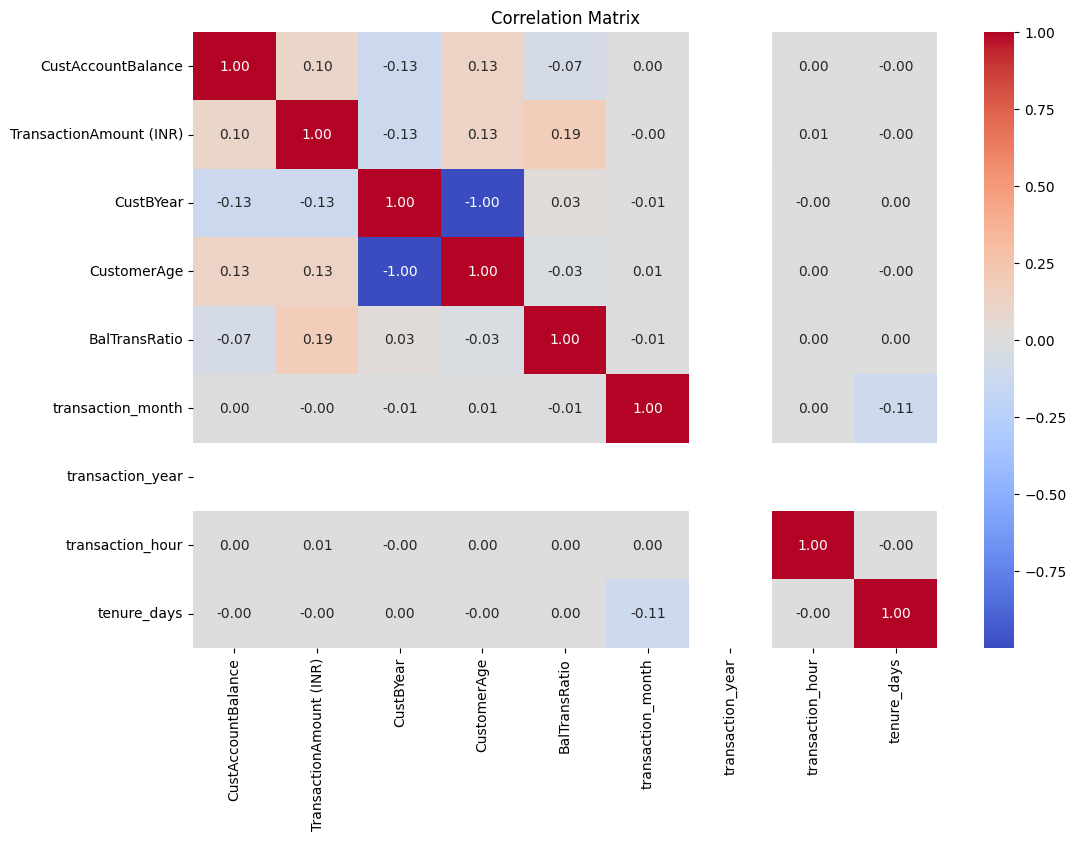

In [41]:
# Scatter plot matrix
sns.pairplot(numeric_df)
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

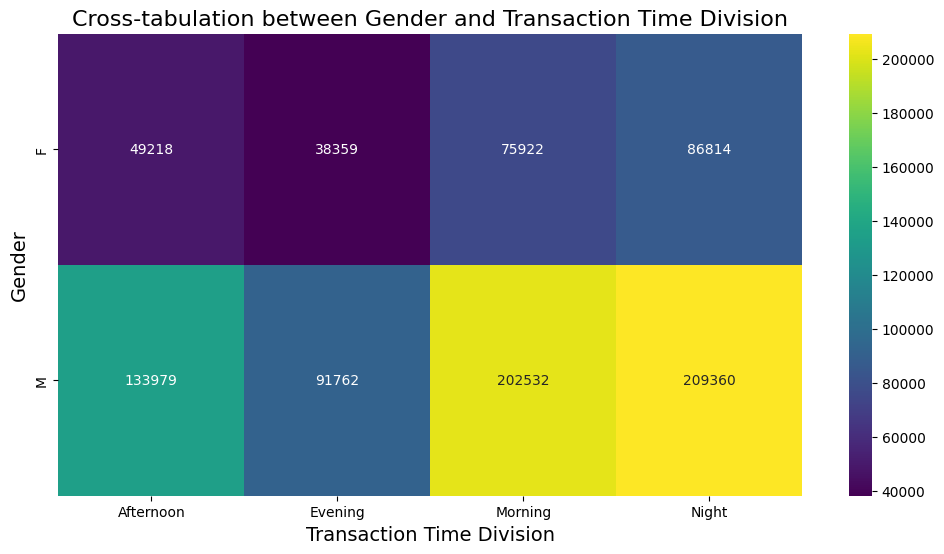

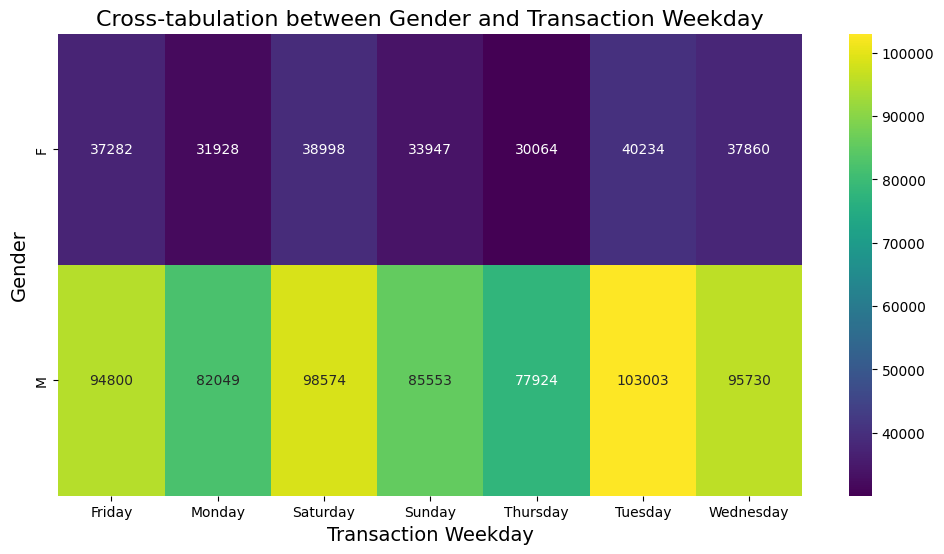

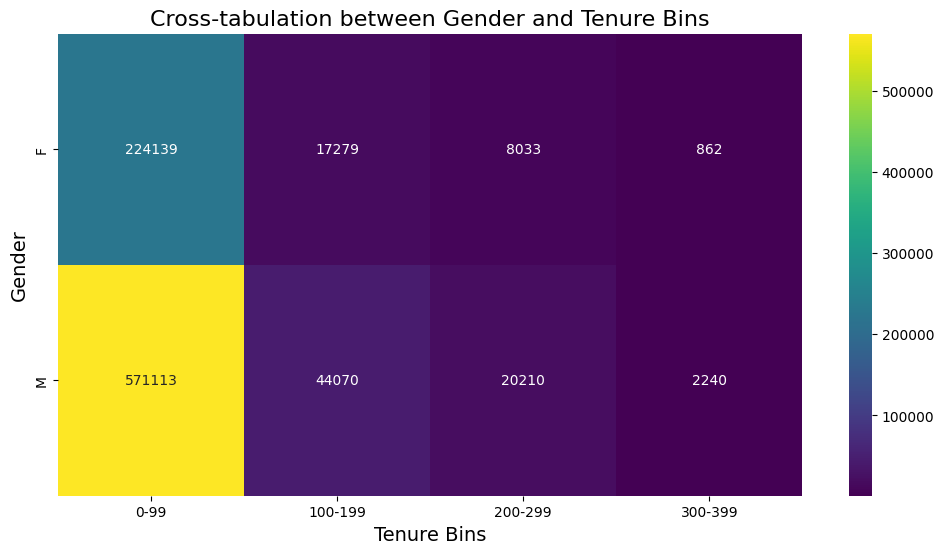

In [42]:
# Cross-tabulation between CustGender and transaction_time_division
gender_time_division_ct = pd.crosstab(df['CustGender'], df['transaction_time_division'])

# Cross-tabulation between CustGender and transaction_weekday
gender_weekday_ct = pd.crosstab(df['CustGender'], df['transaction_weekday'])

# Cross-tabulation between CustGender and tenure_bins
gender_tenure_bins_ct = pd.crosstab(df['CustGender'], df['tenure_bins'])

# Visualize the cross-tabulations
plt.figure(figsize=(12, 6))
sns.heatmap(gender_time_division_ct, annot=True, cmap='viridis', fmt='d')
plt.title('Cross-tabulation between Gender and Transaction Time Division', fontsize=16)
plt.xlabel('Transaction Time Division', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(gender_weekday_ct, annot=True, cmap='viridis', fmt='d')
plt.title('Cross-tabulation between Gender and Transaction Weekday', fontsize=16)
plt.xlabel('Transaction Weekday', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(gender_tenure_bins_ct, annot=True, cmap='viridis', fmt='d')
plt.title('Cross-tabulation between Gender and Tenure Bins', fontsize=16)
plt.xlabel('Tenure Bins', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.show()

### 5. RFM - Recency, Frequency, Monetary
<img src="https://miro.medium.com/max/638/0*JddVeZpHXdElEec_" alt="RFM" >

#### **Transaction Frequency**
This gives is the idea on how frequent the customers are using the services of the bank.  
We can group the dataset by CustomerID and calculate the frequency of transactions over different time periods (for time period of an year)

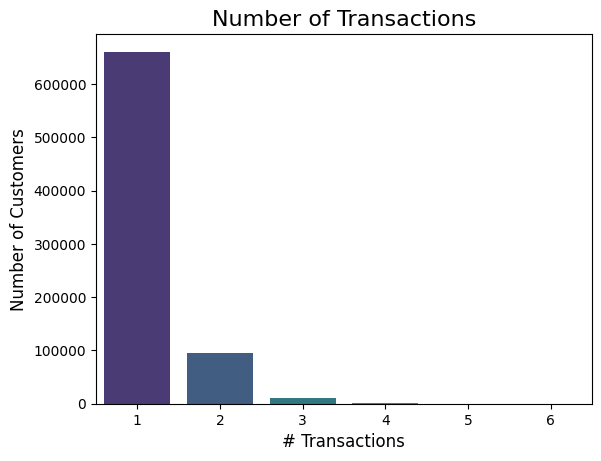

In [43]:
transactions = df.groupby('CustomerID')['TransactionID'].nunique().reset_index()
trans_counts = transactions['TransactionID'].value_counts()
category_percentages = transactions['TransactionID'].value_counts(normalize=True) * 100
sns.barplot(x=trans_counts.index, y=trans_counts.values, palette='viridis')
plt.xlabel('# Transactions', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Number of Transactions', fontsize=16)
plt.show()

Most of the customers have only 1 transactions made. Which covers 85% of the all customers.

And 1467 customers out of 839835 (0.17%) made more than 4 transactions. 

#### **Recency of Last Transaction:**

Measure how recent the last transaction was compared to the current date, giving insight into how active the customer is

Recency = CurrentDate - LastTransactionDate

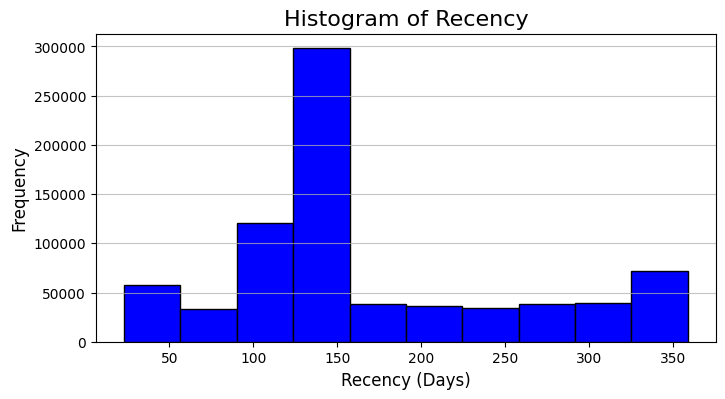

In [44]:
today_date = datetime(2017, 1, 1)
df['Recency'] = (today_date - df['TransactionDate']).dt.days
customer_recency = df.groupby('CustomerID')['Recency'].max().reset_index()
plt.figure(figsize=(8, 4))  # Set the figure size
plt.hist(customer_recency['Recency'], bins=10, color='blue', edgecolor='black')  # Histogram with 10 bins
plt.xlabel('Recency (Days)', fontsize=12)  # X-axis label
plt.ylabel('Frequency', fontsize=12)        # Y-axis label
plt.title('Histogram of Recency', fontsize=16)  # Title of the plot
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines for better readability
plt.show()  # Display the plot

So, there are customers who were active recently, but a significant number of customers have not been active for a long period.

Customers who were active for more than 200-360 days (more than 6 months) can be categorized as inactive (let's say) or churned customers.  
The customers who were active for 120 - 200 days are at high risk of churning but may not yet become inactive. So these are high-priority buckets for the banks to offer some benefits to avoid the further loss of customers.

Let's see and visualize these buckets as well.

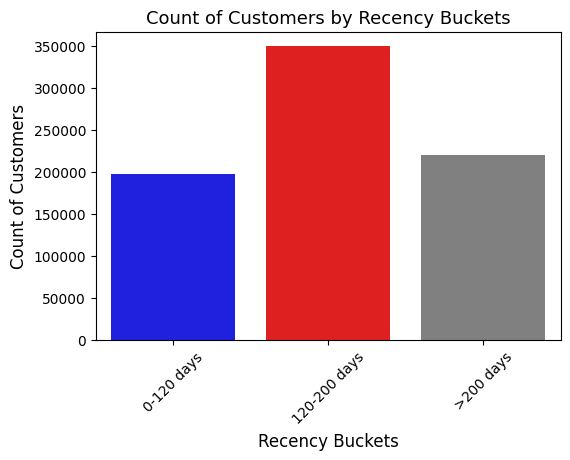

In [45]:
bins = [0, 120, 200, float('inf')]  # Define the bin edges
labels = ['0-120 days', '120-200 days', '>200 days']  # Define the labels for the bins
customer_recency['Recency_Bucket'] = pd.cut(customer_recency['Recency'], bins=bins, labels=labels, right=False)
bucket_counts = customer_recency['Recency_Bucket'].value_counts()
colors = ['blue', 'red', 'grey']
plt.figure(figsize=(6, 4))  # Set the figure size
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette=colors)
# Add labels and title
plt.xlabel('Recency Buckets', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.title('Count of Customers by Recency Buckets', fontsize=13)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()  # Display the plot

As we can see there are many customers at high risk of churning

#### **Average Transaction Amount**

In [46]:
df['Avg Transaction amnt'] = df.groupby('CustomerID')['TransactionAmount (INR)'].transform('sum')/df.groupby('CustomerID')['TransactionID'].transform('nunique')
avg_trans = df[['CustomerID','Avg Transaction amnt']].drop_duplicates()
avg_trans['Avg Transaction amnt'].describe()

count   767756.00
mean      1270.40
std       4253.60
min          0.00
25%        172.00
50%        450.00
75%       1100.00
max     543699.36
Name: Avg Transaction amnt, dtype: float64

<Axes: >

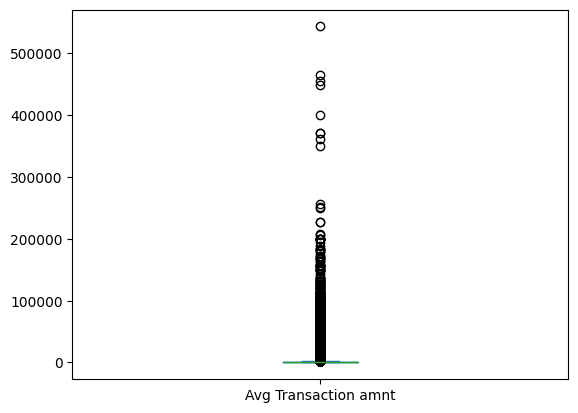

In [47]:
avg_trans['Avg Transaction amnt'].plot(kind='box')

As we can see,  the average transaction has a very long tail with some high extremes. These are not outliers but are some high transactions.

To have a better look at their distribution let's transform them and have a look at them.

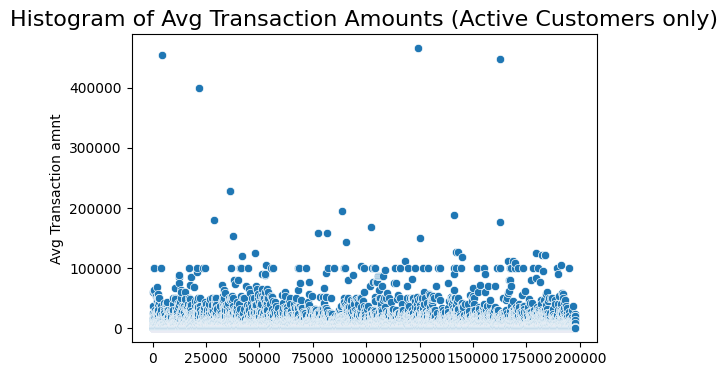

In [48]:
avg_trans = avg_trans.merge(customer_recency,on='CustomerID',how='left')
data_temp = avg_trans[avg_trans['Recency_Bucket']=='0-120 days'].reset_index()['Avg Transaction amnt']
plt.figure(figsize=(6, 4))
sns.scatterplot(data_temp)
plt.title('Histogram of Avg Transaction Amounts (Active Customers only)', fontsize=16)
plt.show()

#### **Transaction Variability**

Measuring the standard deviation of transaction amounts for each customer. A high variability could indicate sporadic big purchases or unstable spending behavior.

In [49]:
## Lets look at only active customers
Active_customers = customer_recency[customer_recency['Recency_Bucket']=='0-120 days']['CustomerID']
freeq_customers = transactions[transactions['TransactionID']>1]['CustomerID']
Active_customers = list(set(Active_customers) & set(freeq_customers))
## Calculating the std of transaction amount by customer
trasn_std = df.groupby('CustomerID')['TransactionAmount (INR)'].std().reset_index()
active_cust_trans_std = trasn_std[trasn_std['CustomerID'].isin(Active_customers)]
active_cust_trans_std['TransactionAmount (INR)'].describe()

count    8047.00
mean     1191.34
std      3397.67
min         0.00
25%       137.89
50%       377.60
75%      1018.71
max     98924.24
Name: TransactionAmount (INR), dtype: float64

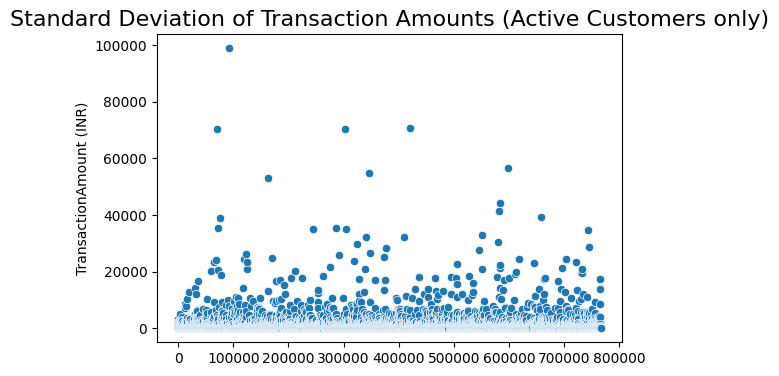

In [50]:
plt.figure(figsize=(6, 4))
sns.scatterplot(active_cust_trans_std['TransactionAmount (INR)'])
plt.title('Standard Deviation of Transaction Amounts (Active Customers only)', fontsize=16)
plt.show()

The plot gives us the idea that there are so many stable transaction customers and some unstable/high transaction customers as well.

#### **Balance Change**

We can calculate changes in balance after each transaction by looking at CustAccountBalance over time.  
The difference in balance could indicate whether the customer is saving, withdrawing, or topping up funds.

In [51]:
balance_change_temp = df.sort_values(by=['CustomerID', 'TransactionDate'])
balance_change_temp = balance_change_temp[balance_change_temp['CustomerID'].isin(Active_customers)]
## Creating lag values columns
balance_change_temp['lag1_balance'] = balance_change_temp.groupby('CustomerID')['CustAccountBalance'].shift(1)
balance_change_temp['lag2_balance'] = balance_change_temp.groupby('CustomerID')['CustAccountBalance'].shift(2)
balance_change_temp['lag3_balance'] = balance_change_temp.groupby('CustomerID')['CustAccountBalance'].shift(3)
balance_change_temp['lag4_balance'] = balance_change_temp.groupby('CustomerID')['CustAccountBalance'].shift(4)
balance_change_temp['lag5_balance'] = balance_change_temp.groupby('CustomerID')['CustAccountBalance'].shift(5)
balance_change_temp['lag6_balance'] = balance_change_temp.groupby('CustomerID')['CustAccountBalance'].shift(6)

In [52]:
transaction_data = balance_change_temp.drop_duplicates(subset='CustomerID',keep='last')

In [53]:
# Define a function to check the trend
def check_trend(row):
    lags = [row['lag6_balance'], row['lag5_balance'], row['lag4_balance'], 
            row['lag3_balance'], row['lag2_balance'], row['lag1_balance'],row['CustAccountBalance']]
    
    # Remove any NaN values if there are missing lags
    lags = [x for x in lags if pd.notnull(x)]
    
    # Check if all lag values are increasing
    if all(x < y for x, y in zip(lags, lags[1:])):
        return 'saving'
    
    # Check if all lag values are decreasing
    elif all(x > y for x, y in zip(lags, lags[1:])):
        return 'withdrawing'
    
    # If neither increasing nor decreasing, the trend is mixed
    else:
        return 'mixed'
# Apply the function to each row of the DataFrame
transaction_data['trend'] = transaction_data.apply(check_trend, axis=1)
transaction_data = transaction_data[['CustomerID','trend']]
transaction_data = transaction_data['trend'].value_counts().reset_index()

<Axes: xlabel='trend', ylabel='count'>

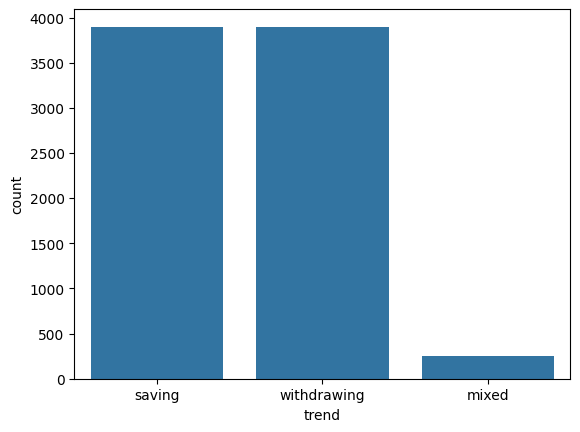

In [54]:
sns.barplot(x=transaction_data['trend'],y=transaction_data['count'])

As we can see there is a significant number of accounts that are used for both depositing and withdrawing which represents salary account types. Others that are only used for withdrawing and saving are fairly in the same range and are fewer in numbers

**RFM is a common technique in customer segmentation to categorize customers based on their transaction behavior.**    

**Recency**: When was their last transaction?  
**Frequency**: How often do they transact?  
**Monetary**: How much do they spend?  

Now that we have already created all 3 Recency, Frequency, and Monetary features, let's dive into further analysis.  
Let's assign some scores for all 3 features and then create the different buckets of feature values with combinations to segment the customers.  
Let's start with creating the appropriate dataset we need.

In [55]:
RFM_data = pd.DataFrame()
all_customers = df['CustomerID'].unique()
RFM_data['CustomerID'] = all_customers
## Merging with Transactions data to get # unique transactions made
RFM_data = RFM_data.merge(transactions,on='CustomerID',how='left')
RFM_data.rename(columns={'TransactionID':'Frequency'},inplace=True)
## Merging with Recency data to get recency of each customer
RFM_data = RFM_data.merge(customer_recency[['CustomerID','Recency']],on='CustomerID',how='left')
## Merging with Avg transactio data to get monetary value of customers
RFM_data = RFM_data.merge(avg_trans[['CustomerID','Avg Transaction amnt']],on='CustomerID',how='left')

In [56]:
# Assign R, F, and M scores by dividing into quintiles
RFM_data['R_Score'] = pd.qcut(RFM_data['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
RFM_data['F_Score'] = pd.cut(RFM_data['Frequency'], bins=5, labels=[1, 2, 3, 4, 5])
## Since Avg Transaction is highly skewed, will transform the value first and then cut them into bins
RFM_data['LogMonetaryValue'] = np.log1p(RFM_data['Avg Transaction amnt'])
RFM_data['M_Score'] = pd.qcut(RFM_data['LogMonetaryValue'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

In [57]:
# Combine R, F, and M scores into a single RFM Score
RFM_data['RFM_Score'] = RFM_data['R_Score'].astype(str) + RFM_data['F_Score'].astype(str) + RFM_data['M_Score'].astype(str)

#### **We can now segment customers based on these RFM scores. Here are some commonly used segments:**
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*DRvaUZqZ5yYmEM0DhqnpfQ.png">

In [58]:
def rfm_segment(df):
    if df['R_Score'] in ['5'] and df['M_Score'] in ['4','5']:
        return "champions"
    elif df['R_Score'] in ['4', '5'] and df['M_Score'] in ['4', '5']:
        return "loyal customers"
    elif df['R_Score'] in ['4', '5'] and df['M_Score'] in ['3']:
        return "potential loyalists"
    elif df['R_Score'] in ['4', '5'] and df['M_Score'] in ['1', '2']:
        return "new customers"
    elif df['R_Score'] in ['3'] and df['M_Score'] in ['4', '5']:
        return "can't lose them"
    elif df['R_Score'] in ['3'] and df['M_Score'] in ['3']:
        return "need attention"
    elif df['R_Score'] in ['3'] and df['M_Score'] in ['1', '2']:
        return "about to sleep"
    elif df['R_Score'] in ['1', '2'] and df['M_Score'] in ['4', '5']:
        return "at risk"
    elif df['R_Score'] in ['1', '2'] and df['M_Score'] in ['1', '2']:
        return "hibernating"
    elif df['R_Score'] in ['4'] and df['M_Score'] in ['2', '3']:
        return "promising"
    else:
        return "Other"
RFM_data['R_Score'] = RFM_data['R_Score'].astype(str)
RFM_data['F_Score'] = RFM_data['F_Score'].astype(str)
RFM_data['M_Score'] = RFM_data['M_Score'].astype(str)

# Apply the function to the RFM_data DataFrame
RFM_data['Customer_Segment'] = RFM_data.apply(rfm_segment, axis=1)

In [59]:
RFM_data['Customer_Segment'].value_counts()

Customer_Segment
new customers          138035
at risk                121126
hibernating            112472
can't lose them         67725
about to sleep          63319
loyal customers         59616
potential loyalists     58929
champions               58490
Other                   57395
need attention          30649
Name: count, dtype: int64

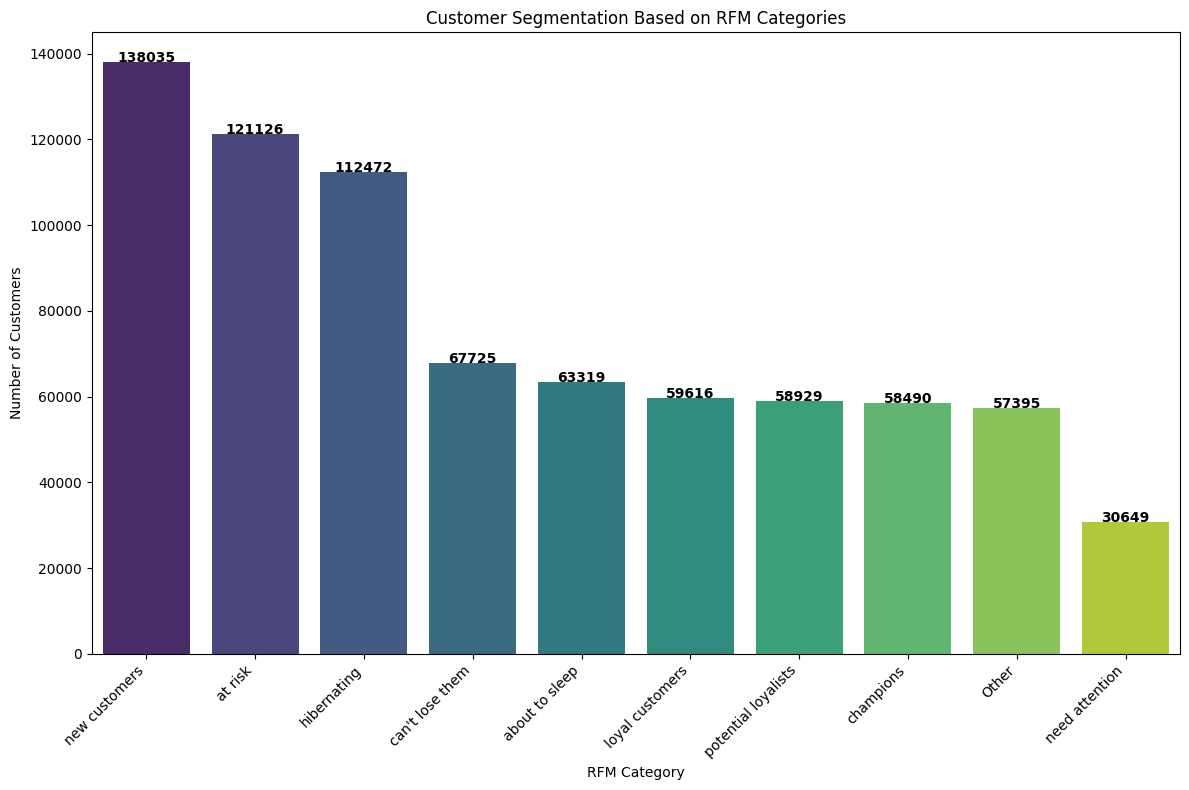

In [60]:
# Calculate the customer count for each RFM category
rfm_category_counts = RFM_data['Customer_Segment'].value_counts().reset_index()
rfm_category_counts.columns = ['rfm_category', 'customer_count']
plt.figure(figsize=(12, 8))
sns.barplot(x='rfm_category', y='customer_count', data=rfm_category_counts, palette='viridis')

# Adding labels on top of each bar
for index, row in rfm_category_counts.iterrows():
    plt.text(index, row['customer_count'] + 5, row['customer_count'], ha='center', color='black', fontweight='bold')

# Customizing the plot
plt.title('Customer Segmentation Based on RFM Categories')
plt.xlabel('RFM Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha="right")  # Rotate category names for readability
plt.tight_layout()

# Display the plot
plt.show()


### 6. Profiling

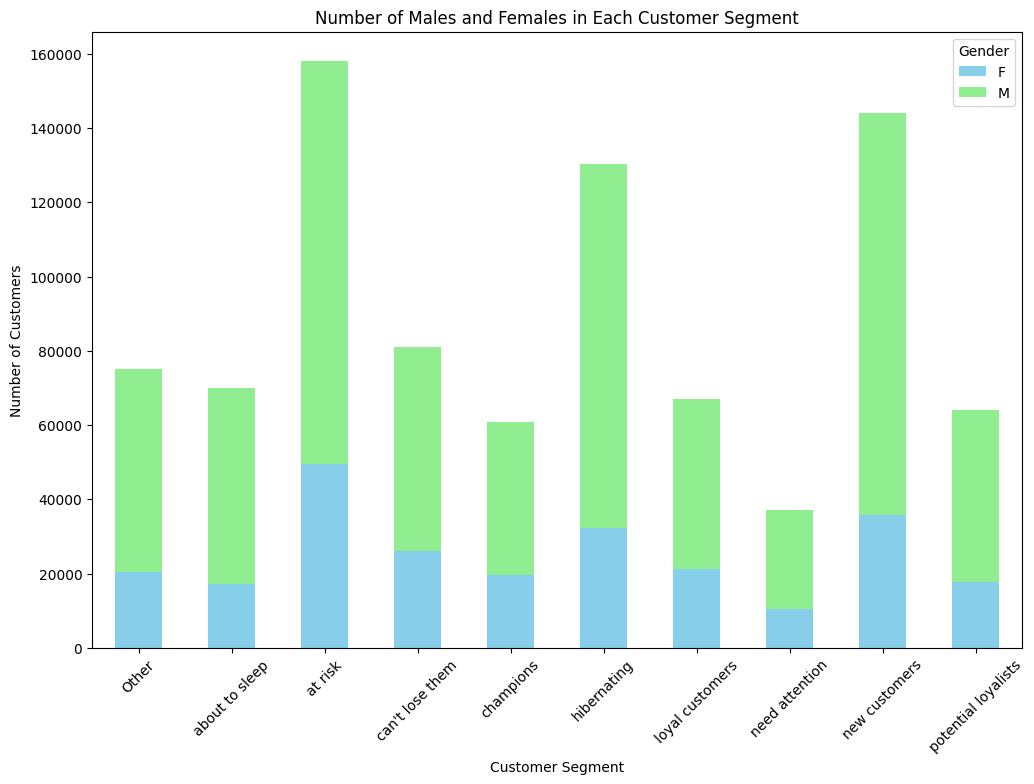

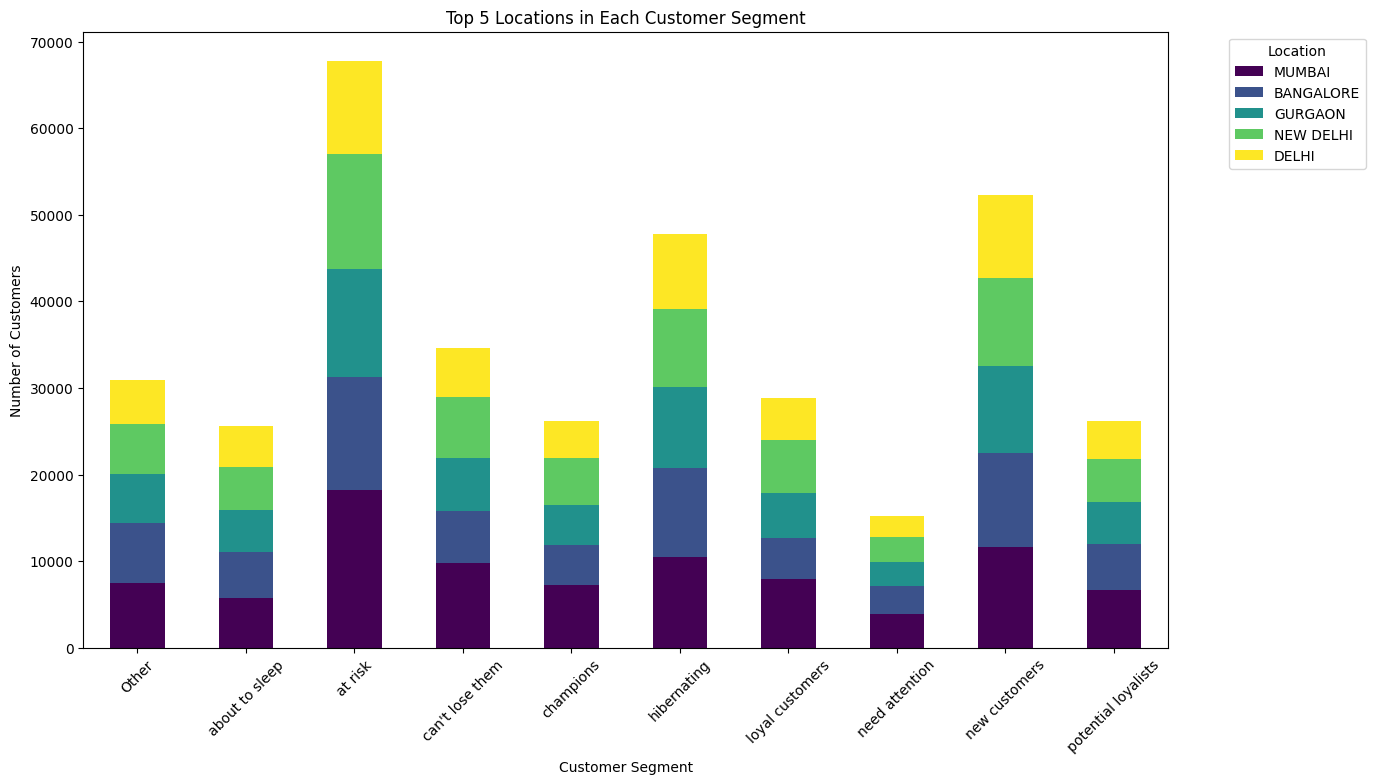

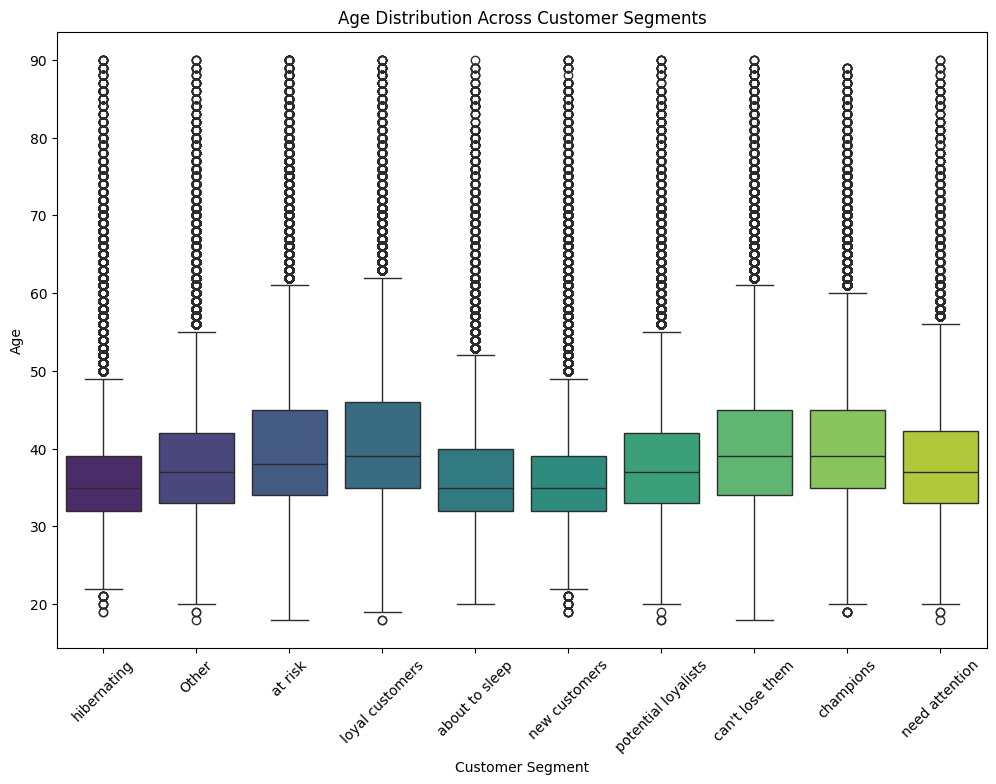

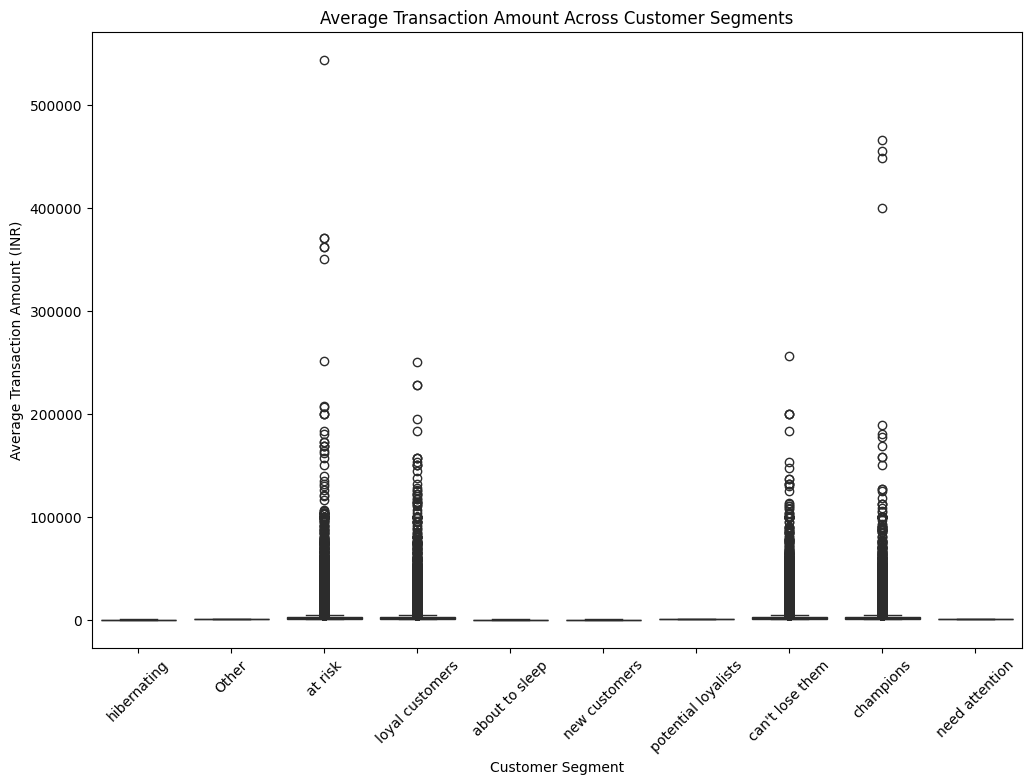

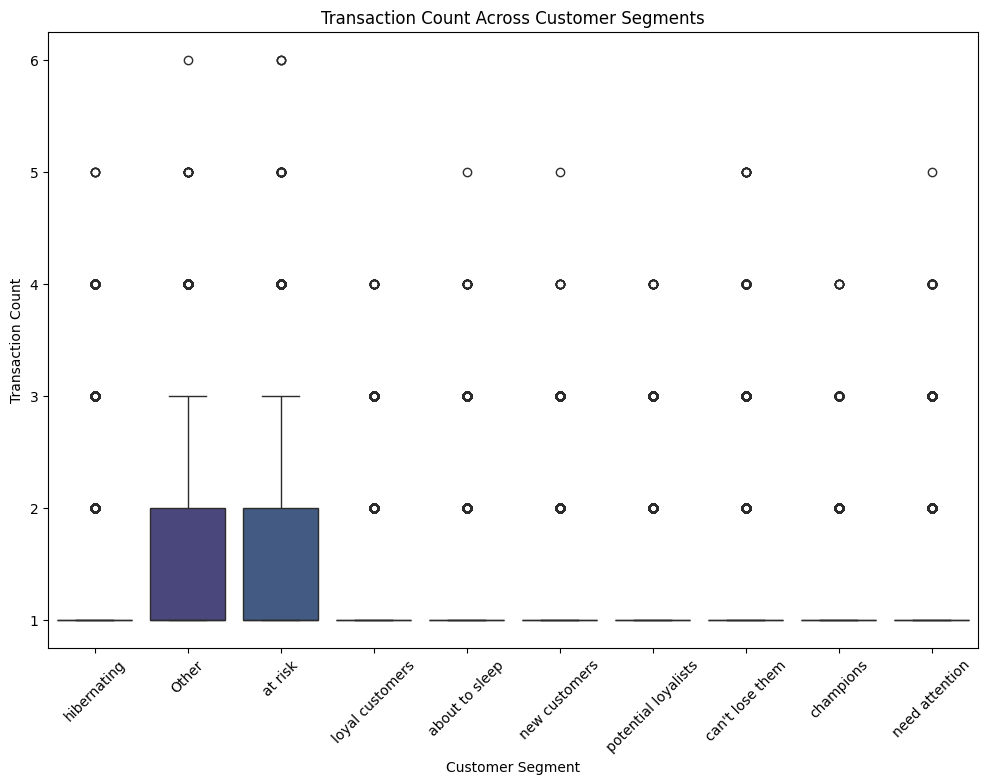

In [61]:
# Merge RFM_data with the main dataframe to get additional customer details
merged_data = df.merge(RFM_data[['CustomerID', 'Customer_Segment']], on='CustomerID', how='left')

# Number of males and females in each segment
gender_segment_counts = merged_data.groupby(['Customer_Segment', 'CustGender']).size().unstack().fillna(0)
gender_segment_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen'])
plt.title('Number of Males and Females in Each Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Top 5 locations in each segment
top_locations_segment = merged_data.groupby(['Customer_Segment', 'CustLocation']).size().groupby(level=0, group_keys=False).nlargest(5).unstack().fillna(0)
top_locations_segment.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Top 5 Locations in Each Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Age distribution for each segment
plt.figure(figsize=(12, 8))
sns.boxplot(x='Customer_Segment', y='CustomerAge', data=merged_data, palette='viridis')
plt.title('Age Distribution Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Average transaction amount for each segment
plt.figure(figsize=(12, 8))
sns.boxplot(x='Customer_Segment', y='Avg Transaction amnt', data=merged_data, palette='viridis')
plt.title('Average Transaction Amount Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Average Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

# Transaction count for each segment
plt.figure(figsize=(12, 8))
sns.boxplot(x='Customer_Segment', y='Frequency', data=RFM_data, palette='viridis')
plt.title('Transaction Count Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (customers)
G.add_nodes_from(new['CustomerID'].unique())

# Add edges (transactions)
for _, row in new.iterrows():
    G.add_edge(row['CustomerID'], row[''], weight=row['TransactionAmount (INR)'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title('Customer Transaction Network')
plt.show()

# Analyze the network structure
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Identify influential customers
influential_customers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Influential Customers based on Degree Centrality:")
for customer, centrality in influential_customers:
    print(f"Customer ID: {customer}, Centrality: {centrality}")

# Detect communities using the Girvan-Newman method

communities = girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))
print("Detected Communities:")
for community in sorted_communities:
    print(community) 

It creates a network graph between customers 

### 7. Conclusion

In this project, we conducted a comprehensive **Exploratory Data Analysis (EDA)** and **RFM analysis** to segment the bank’s customer base. By analyzing various aspects of the data, we derived valuable insights into customer behavior and trends.

### Key Findings:
1. **Customer Demographics**:
    - The dataset includes over 1 million transactions from more than 800K customers.
    - Customers are segmented by age, gender, and location, providing a detailed demographic overview.

2. **Time-Based Analysis**:
    - Transactions were analyzed based on the time of day, day of the week, and month.
    - Peak transaction times and days were identified, helping to understand customer activity patterns.

3. **Age-Based Analysis**:
    - Customers were grouped into age categories, revealing spending patterns and transaction behaviors across different age groups.
    - Younger customers (18-25) showed higher transaction-to-balance ratios, indicating more frequent spending.

4. **Transaction Analysis**:
    - The distribution of transaction amounts was examined, highlighting the variability in customer spending.
    - Monthly and hourly transaction trends were plotted to identify peak periods.

5. **RFM Analysis**:
    - Customers were evaluated on **Recency**, **Frequency**, and **Monetary value**.
    - RFM scores were assigned, and customers were segmented into categories such as "champions," "loyal customers," "at risk," and "hibernating."
    - The segmentation provides actionable insights for targeted marketing and customer retention strategies.

6. **Network Analysis**:
    - A network graph was created to visualize customer transactions.
    - Influential customers were identified based on centrality measures, and community detection was performed to find customer clusters.

### Output Data:
- **Active Customers**: A list of 8047 active customers.
- **RFM Data**: A DataFrame containing RFM scores and customer segments for 767,756 customers.
- **Balance Report**: Summary statistics of account balances and transaction amounts by customer age.
- **Correlation Matrix**: Heatmap showing correlations between numerical variables.
- **Customer Segments**: Distribution of customers across different RFM segments.
- **Transaction Trends**: Analysis of transaction amounts by time of day and month.
- **Demographic Insights**: Gender and location distributions within customer segments.

### Conclusion:
The insights gained from this analysis provide a solid foundation for the bank to enhance its customer engagement strategies. By understanding customer behavior and preferences, the bank can tailor its marketing efforts to different customer segments, improving satisfaction and profitability. Future work could involve tracking customer movement between segments over time and integrating additional data sources for a more holistic view of customer behavior.